# Clustering Case Study: Customer Segmentation with K-Means -  Tier 3
***
This case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog. Please feel free to refer to the post for additional information, and solutions.

Structure of the mini-project:

1. **Sourcing and loading**
    * Load the data
    * Explore the data


2. **Cleaning, transforming and visualizing**
    * Data Wrangling: Exercise Set 1
        - Creating a matrix with a binary indicator for whether they responded to a given offer
        - Ensure that in doing so, NAN values are dealt with appropriately
    

3. **Modelling** 
    * K-Means clustering: Exercise Sets 2 and 3
        - Choosing K: The Elbow method
        - Choosing K: The Silhouette method
        - Choosing K: The Gap statistic method
    
    * Visualizing clusters with PCA: Exercise Sets 4 and 5


4. **Conclusions and next steps**
    * Conclusions
    * Other clustering algorithms (Exercise Set 6)

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [4]:
df_offers = pd.read_excel('WineKMC.xlsx', sheet_name=0)

/Users/deens/miniforge3/envs/tf_m1/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
#mannn why we always gotta talk about WINE?!

### 1b. Explore the data

In [5]:
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

offer_id  campaign            varietal  min_qty  discount       origin  \
0         1   January              Malbec       72        56       France   
1         2   January          Pinot Noir       72        17       France   
2         3  February           Espumante      144        32       Oregon   
3         4  February           Champagne       72        48       France   
4         5  February  Cabernet Sauvignon      144        44  New Zealand   

   past_peak  
0      False  
1      False  
2       True  
3       True  
4       True

We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [6]:
df_transactions = pd.read_excel('WineKMC.xlsx', sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

/Users/deens/miniforge3/envs/tf_m1/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


customer_name  offer_id  n
0         Smith         2  1
1         Smith        24  1
2       Johnson        17  1
3       Johnson        24  1
4       Johnson        26  1

In [ ]:
#'n'? all 1's? was something about this somewhere...

In [190]:
df_transactions.shape

(324, 3)

## 2. Cleaning, transforming and visualizing
### 2a. Data Wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [ ]:
#wait so why did we needa use merge? don't use anything from the first table?
#unless they want us to dummy all the customer names into columns?!
#don't think so tho??
#so yeah what do we even need this first one for then? what were we supposed
#to merge? merge the 2nd to itself??

In [9]:
#check for nans
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_name  324 non-null    object
 1   offer_id       324 non-null    int64 
 2   n              324 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.7+ KB


In [10]:
len(df_transactions)

324

In [192]:
df_transactions.customer_name.value_counts()

Sanders    9
Fisher     7
Sanchez    7
Miller     7
Morales    6
          ..
Powell     1
Jones      1
Green      1
Torres     1
Ramirez    1
Name: customer_name, Length: 100, dtype: int64

In [ ]:
#ohh..so none?

In [198]:
#OH WAIT NO! this way i did pivot table counted the NUMBER OF OFFER_IDs
#EACH OF THE 100 CUSTOMERS TOOK!!!!

#so we simply want a pivot table of the customers for the offers they responded to?

#ahh, okay, so we needa like 'flatten' this so that we got a SEPARATE column
#for each offer_id val;
#well, we can do get_dummies, except that doesn't work on numbers..
#so let's see the other one, iverson
#>>MELT!
# pivot=df_transactions.pivot_table('offer_id','customer_name',aggfunc='count')
# # pivot_melt = 
# pivot.melt()
# pivot


In [ ]:
#perhaps i was thinking of UNSTACKING before

In [195]:
pivot.index.value_counts()

Adams         1
Perez         1
Rivera        1
Richardson    1
Reyes         1
             ..
Green         1
Gray          1
Gonzalez      1
Gomez         1
Young         1
Name: customer_name, Length: 100, dtype: int64

In [196]:
pivot.index.value_counts().value_counts()

1    100
Name: customer_name, dtype: int64

In [22]:
#ohh wait, no lol - that's the opposite - that makes it LONG!

#so let's go back to the get_dummies idea but let's just CONVERT TYPES TO STRINGS!
pd.get_dummies(df_transactions,columns=['offer_id'])

customer_name  n  offer_id_1  offer_id_2  offer_id_3  offer_id_4  \
0           Smith  1           0           1           0           0   
1           Smith  1           0           0           0           0   
2         Johnson  1           0           0           0           0   
3         Johnson  1           0           0           0           0   
4         Johnson  1           0           0           0           0   
..            ... ..         ...         ...         ...         ...   
319        Fisher  1           0           0           0           0   
320        Fisher  1           0           0           0           0   
321        Fisher  1           0           0           0           0   
322        Fisher  1           0           0           0           0   
323        Fisher  1           0           0           0           0   

     offer_id_5  offer_id_6  offer_id_7  offer_id_8  ...  offer_id_23  \
0             0           0           0           0  ...            0   
1             0           0           0           0  ...            0   
2             0           0           0           0  ...            0   
3             0           0           0           0  ...            0   
4             0           0           0           0  ...            0   
..          ...         ...         ...         ...  ...          ...   
319           0           0           0           0  ...            0   
320           0           0           0           0  ...            0   
321           0           0           0           0  ...            0   
322           0           0           0           0  ...            0   
323           0           0           0           0  ...            0   

     offer_id_24  offer_id_25  offer_id_26  offer_id_27  offer_id_28  \
0              0            0            0            0            0   
1              1            0            0            0            0   
2              0            0            0            0            0   
3              1            0            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
319            0            0            0            0            0   
320            0            0            0            0            0   
321            0            0            0            0            1   
322            0            0            0            0            0   
323            0            0            0            0            0   

     offer_id_29  offer_id_30  offer_id_31  offer_id_32  
0              0            0            0            0  
1              0            0            0            0  
2              0            0            0            0  
3              0            0            0            0  
4              0            0            0            0  
..           ...          ...          ...          ...  
319            0            0            0            0  
320            0            0            0            0  
321            0            0            0            0  
322            0            1            0            0  
323            0            0            1            0  

[324 rows x 34 columns]

In [23]:
#oh!!!!! wait - so it DOES work with numericals???
#didn't have to do .astype(str)???
#or when i was playing around before this did that take effect? i didn't store it tho
#but it's possible?

#anyway ALHAMDULILLAH THIS IS EXACTLY WHAT I WANTED ENVISIONED!!!

#didn't know so many offers

#also, forgot about n... so will just leave for now - can always take off later (lol like cold weather)

dummy_df = pd.get_dummies(df_transactions,columns=['offer_id'])
dummy_df

customer_name  n  offer_id_1  offer_id_2  offer_id_3  offer_id_4  \
0           Smith  1           0           1           0           0   
1           Smith  1           0           0           0           0   
2         Johnson  1           0           0           0           0   
3         Johnson  1           0           0           0           0   
4         Johnson  1           0           0           0           0   
..            ... ..         ...         ...         ...         ...   
319        Fisher  1           0           0           0           0   
320        Fisher  1           0           0           0           0   
321        Fisher  1           0           0           0           0   
322        Fisher  1           0           0           0           0   
323        Fisher  1           0           0           0           0   

     offer_id_5  offer_id_6  offer_id_7  offer_id_8  ...  offer_id_23  \
0             0           0           0           0  ...            0   
1             0           0           0           0  ...            0   
2             0           0           0           0  ...            0   
3             0           0           0           0  ...            0   
4             0           0           0           0  ...            0   
..          ...         ...         ...         ...  ...          ...   
319           0           0           0           0  ...            0   
320           0           0           0           0  ...            0   
321           0           0           0           0  ...            0   
322           0           0           0           0  ...            0   
323           0           0           0           0  ...            0   

     offer_id_24  offer_id_25  offer_id_26  offer_id_27  offer_id_28  \
0              0            0            0            0            0   
1              1            0            0            0            0   
2              0            0            0            0            0   
3              1            0            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
319            0            0            0            0            0   
320            0            0            0            0            0   
321            0            0            0            0            1   
322            0            0            0            0            0   
323            0            0            0            0            0   

     offer_id_29  offer_id_30  offer_id_31  offer_id_32  
0              0            0            0            0  
1              0            0            0            0  
2              0            0            0            0  
3              0            0            0            0  
4              0            0            0            0  
..           ...          ...          ...          ...  
319            0            0            0            0  
320            0            0            0            0  
321            0            0            0            0  
322            0            1            0            0  
323            0            0            1            0  

[324 rows x 34 columns]

In [156]:
dummy_df.n.nunique()

1

In [199]:
dummy_df_trim=dummy_df.drop(['n'],axis=1)
dummy_df_trim

customer_name  offer_id_1  offer_id_2  offer_id_3  offer_id_4  offer_id_5  \
0           Smith           0           1           0           0           0   
1           Smith           0           0           0           0           0   
2         Johnson           0           0           0           0           0   
3         Johnson           0           0           0           0           0   
4         Johnson           0           0           0           0           0   
..            ...         ...         ...         ...         ...         ...   
319        Fisher           0           0           0           0           0   
320        Fisher           0           0           0           0           0   
321        Fisher           0           0           0           0           0   
322        Fisher           0           0           0           0           0   
323        Fisher           0           0           0           0           0   

     offer_id_6  offer_id_7  offer_id_8  offer_id_9  ...  offer_id_23  \
0             0           0           0           0  ...            0   
1             0           0           0           0  ...            0   
2             0           0           0           0  ...            0   
3             0           0           0           0  ...            0   
4             0           0           0           0  ...            0   
..          ...         ...         ...         ...  ...          ...   
319           0           0           0           0  ...            0   
320           0           0           0           0  ...            0   
321           0           0           0           0  ...            0   
322           0           0           0           0  ...            0   
323           0           0           0           0  ...            0   

     offer_id_24  offer_id_25  offer_id_26  offer_id_27  offer_id_28  \
0              0            0            0            0            0   
1              1            0            0            0            0   
2              0            0            0            0            0   
3              1            0            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
319            0            0            0            0            0   
320            0            0            0            0            0   
321            0            0            0            0            1   
322            0            0            0            0            0   
323            0            0            0            0            0   

     offer_id_29  offer_id_30  offer_id_31  offer_id_32  
0              0            0            0            0  
1              0            0            0            0  
2              0            0            0            0  
3              0            0            0            0  
4              0            0            0            0  
..           ...          ...          ...          ...  
319            0            0            0            0  
320            0            0            0            0  
321            0            0            0            0  
322            0            1            0            0  
323            0            0            1            0  

[324 rows x 33 columns]

In [201]:
#okay so i think i'm supposed to take this and maybe NOW merge it with
#itself on customer_name, like keeping only the first? let's play around...

dummy_df_trim.merge(right=dummy_df_trim,how='left',on='customer_name')

customer_name  offer_id_1_x  offer_id_2_x  offer_id_3_x  offer_id_4_x  \
0            Smith             0             1             0             0   
1            Smith             0             1             0             0   
2            Smith             0             0             0             0   
3            Smith             0             0             0             0   
4          Johnson             0             0             0             0   
...            ...           ...           ...           ...           ...   
1301        Fisher             0             0             0             0   
1302        Fisher             0             0             0             0   
1303        Fisher             0             0             0             0   
1304        Fisher             0             0             0             0   
1305        Fisher             0             0             0             0   

      offer_id_5_x  offer_id_6_x  offer_id_7_x  offer_id_8_x  offer_id_9_x  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
1301             0             0             0             0             0   
1302             0             0             0             0             0   
1303             0             0             0             0             0   
1304             0             0             0             0             0   
1305             0             0             0             0             0   

      ...  offer_id_23_y  offer_id_24_y  offer_id_25_y  offer_id_26_y  \
0     ...              0              0              0              0   
1     ...              0              1              0              0   
2     ...              0              0              0              0   
3     ...              0              1              0              0   
4     ...              0              0              0              0   
...   ...            ...            ...            ...            ...   
1301  ...              0              0              0              0   
1302  ...              0              0              0              0   
1303  ...              0              0              0              0   
1304  ...              0              0              0              0   
1305  ...              0              0              0              0   

      offer_id_27_y  offer_id_28_y  offer_id_29_y  offer_id_30_y  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
1301              0              0              0              0   
1302              0              0              0              0   
1303              0              1              0              0   
1304              0              0              0              1   
1305              0              0              0              0   

      offer_id_31_y  offer_id_32_y  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  
...             ...            ...  
1301              0              0  
1302              0              0  
1303              0              0  
1304              0              0  
1305              1           

In [202]:
df_transactions_trim=df_transactions.drop(['n'],axis=1)
df_transactions_trim

customer_name  offer_id
0           Smith         2
1           Smith        24
2         Johnson        17
3         Johnson        24
4         Johnson        26
..            ...       ...
319        Fisher        11
320        Fisher        22
321        Fisher        28
322        Fisher        30
323        Fisher        31

[324 rows x 2 columns]

In [212]:
df_transactions_trim.pivot_table(values='customer_name',aggfunc='count',columns='offer_id')
#get the same thing WITHOUT specifying values

offer_id       1   2   3   4   5   6   7   8   9   10  ...  23  24  25  26  \
customer_name  10  10   6  12   4  12  19  20  10   7  ...   5  12   6  15   

offer_id       27  28  29  30  31  32  
customer_name   9   6  17  22  17   4  

[1 rows x 32 columns]

In [229]:
#so yeah, just need THAT^, but broken out by CUSTOMER_NAME
df_transactions_trim.pivot_table(index='customer_name',aggfunc='count',columns='offer_id')

Empty DataFrame
Columns: []
Index: [Adams, Allen, Anderson, Bailey, Baker, Barnes, Bell, Bennett, Brooks, Brown, Butler, Campbell, Carter, Clark, Collins, Cook, Cooper, Cox, Cruz, Davis, Diaz, Edwards, Evans, Fisher, Flores, Foster, Garcia, Gomez, Gonzalez, Gray, Green, Gutierrez, Hall, Harris, Hernandez, Hill, Howard, Hughes, Jackson, James, Jenkins, Johnson, Jones, Kelly, King, Lee, Lewis, Long, Lopez, Martin, Martinez, Miller, Mitchell, Moore, Morales, Morgan, Morris, Murphy, Myers, Nelson, Nguyen, Ortiz, Parker, Perez, Perry, Peterson, Phillips, Powell, Price, Ramirez, Reed, Reyes, Richardson, Rivera, Roberts, Robinson, Rodriguez, Rogers, Ross, Russell, Sanchez, Sanders, Scott, Smith, Stewart, Sullivan, Taylor, Thomas, Thompson, Torres, Turner, Walker, Ward, Watson, White, Williams, Wilson, Wood, Wright, Young]

[100 rows x 0 columns]

In [ ]:
#can't figure out why it won't make the columns for me anymore when
#i make customers my index....
############################################################################

In [233]:
df_transactions_trim.pivot_table(index='customer_name',aggfunc='count')

offer_id
customer_name          
Adams                 3
Allen                 2
Anderson              2
Bailey                2
Baker                 4
...                 ...
Williams              3
Wilson                2
Wood                  4
Wright                4
Young                 6

[100 rows x 1 columns]

In [236]:
df_transactions_trim.groupby('customer_name')['offer_id'].count()

customer_name
Adams       3
Allen       2
Anderson    2
Bailey      2
Baker       4
           ..
Williams    3
Wilson      2
Wood        4
Wright      4
Young       6
Name: offer_id, Length: 100, dtype: int64

In [239]:
df_transactions_trim.pivot_table(index=['customer_name','offer_id'])

Empty DataFrame
Columns: []
Index: [(Adams, 18), (Adams, 29), (Adams, 30), (Allen, 9), (Allen, 27), (Anderson, 24), (Anderson, 26), (Bailey, 7), (Bailey, 30), (Baker, 7), (Baker, 10), (Baker, 19), (Baker, 31), (Barnes, 10), (Barnes, 21), (Barnes, 22), (Barnes, 31), (Bell, 2), (Bell, 17), (Bell, 24), (Bell, 26), (Bennett, 8), (Bennett, 29), (Brooks, 3), (Brooks, 8), (Brooks, 11), (Brooks, 22), (Brown, 7), (Brown, 29), (Brown, 30), (Butler, 1), (Butler, 4), (Butler, 22), (Butler, 28), (Butler, 30), (Campbell, 2), (Campbell, 24), (Campbell, 26), (Carter, 7), (Carter, 13), (Carter, 29), (Carter, 30), (Clark, 4), (Clark, 11), (Clark, 28), (Clark, 31), (Collins, 11), (Collins, 30), (Cook, 24), (Cook, 26), (Cooper, 4), (Cooper, 16), (Cooper, 20), (Cooper, 32), (Cox, 2), (Cox, 17), (Cox, 24), (Cox, 26), (Cruz, 29), (Cruz, 30), (Davis, 12), (Davis, 22), (Davis, 25), (Diaz, 7), (Diaz, 8), (Diaz, 29), (Diaz, 30), (Edwards, 8), (Edwards, 27), (Evans, 22), (Evans, 27), (Fisher, 1), (Fisher, 2), (Fisher, 11), (Fisher, 22), (Fisher, 28), (Fisher, 30), (Fisher, 31), (Flores, 17), (Flores, 24), (Foster, 1), (Foster, 9), (Foster, 14), (Foster, 22), (Foster, 23), (Garcia, 14), (Garcia, 15), (Gomez, 11), (Gomez, 20), (Gomez, 25), (Gomez, 32), (Gonzalez, 9), (Gonzalez, 31), (Gray, 12), (Gray, 16), (Gray, 26), (Green, 7), (Gutierrez, 6), (Gutierrez, 8), (Gutierrez, 10), ...]

[324 rows x 0 columns]

In [244]:
#okay so this gives the offer id's that EACH of the 100 customers took
#so now we'd just have to like UNSTACK these?
#or do a values count on these?

#let's first see if COLUMNS now maybe works?

#>>NOPIE!

# df_transactions_trim.pivot_table(index=['customer_name','offer_id'],columns='offer_id')

In [253]:
#let's try values count of the original
#that just did count of the total number of offers each customer took
#here groupby does the same thing as pivot but NOT as efficiently
pd.DataFrame(df_transactions_trim.groupby(['customer_name','offer_id']).count())

Empty DataFrame
Columns: []
Index: [(Adams, 18), (Adams, 29), (Adams, 30), (Allen, 9), (Allen, 27), (Anderson, 24), (Anderson, 26), (Bailey, 7), (Bailey, 30), (Baker, 7), (Baker, 10), (Baker, 19), (Baker, 31), (Barnes, 10), (Barnes, 21), (Barnes, 22), (Barnes, 31), (Bell, 2), (Bell, 17), (Bell, 24), (Bell, 26), (Bennett, 8), (Bennett, 29), (Brooks, 3), (Brooks, 8), (Brooks, 11), (Brooks, 22), (Brown, 7), (Brown, 29), (Brown, 30), (Butler, 1), (Butler, 4), (Butler, 22), (Butler, 28), (Butler, 30), (Campbell, 2), (Campbell, 24), (Campbell, 26), (Carter, 7), (Carter, 13), (Carter, 29), (Carter, 30), (Clark, 4), (Clark, 11), (Clark, 28), (Clark, 31), (Collins, 11), (Collins, 30), (Cook, 24), (Cook, 26), (Cooper, 4), (Cooper, 16), (Cooper, 20), (Cooper, 32), (Cox, 2), (Cox, 17), (Cox, 24), (Cox, 26), (Cruz, 29), (Cruz, 30), (Davis, 12), (Davis, 22), (Davis, 25), (Diaz, 7), (Diaz, 8), (Diaz, 29), (Diaz, 30), (Edwards, 8), (Edwards, 27), (Evans, 22), (Evans, 27), (Fisher, 1), (Fisher, 2), (Fisher, 11), (Fisher, 22), (Fisher, 28), (Fisher, 30), (Fisher, 31), (Flores, 17), (Flores, 24), (Foster, 1), (Foster, 9), (Foster, 14), (Foster, 22), (Foster, 23), (Garcia, 14), (Garcia, 15), (Gomez, 11), (Gomez, 20), (Gomez, 25), (Gomez, 32), (Gonzalez, 9), (Gonzalez, 31), (Gray, 12), (Gray, 16), (Gray, 26), (Green, 7), (Gutierrez, 6), (Gutierrez, 8), (Gutierrez, 10), ...]

[324 rows x 0 columns]

In [254]:
#so now let's work w/ our pivot but unstack or dummy?
df_transactions_trim.pivot_table(index=['customer_name','offer_id'])

Empty DataFrame
Columns: []
Index: [(Adams, 18), (Adams, 29), (Adams, 30), (Allen, 9), (Allen, 27), (Anderson, 24), (Anderson, 26), (Bailey, 7), (Bailey, 30), (Baker, 7), (Baker, 10), (Baker, 19), (Baker, 31), (Barnes, 10), (Barnes, 21), (Barnes, 22), (Barnes, 31), (Bell, 2), (Bell, 17), (Bell, 24), (Bell, 26), (Bennett, 8), (Bennett, 29), (Brooks, 3), (Brooks, 8), (Brooks, 11), (Brooks, 22), (Brown, 7), (Brown, 29), (Brown, 30), (Butler, 1), (Butler, 4), (Butler, 22), (Butler, 28), (Butler, 30), (Campbell, 2), (Campbell, 24), (Campbell, 26), (Carter, 7), (Carter, 13), (Carter, 29), (Carter, 30), (Clark, 4), (Clark, 11), (Clark, 28), (Clark, 31), (Collins, 11), (Collins, 30), (Cook, 24), (Cook, 26), (Cooper, 4), (Cooper, 16), (Cooper, 20), (Cooper, 32), (Cox, 2), (Cox, 17), (Cox, 24), (Cox, 26), (Cruz, 29), (Cruz, 30), (Davis, 12), (Davis, 22), (Davis, 25), (Diaz, 7), (Diaz, 8), (Diaz, 29), (Diaz, 30), (Edwards, 8), (Edwards, 27), (Evans, 22), (Evans, 27), (Fisher, 1), (Fisher, 2), (Fisher, 11), (Fisher, 22), (Fisher, 28), (Fisher, 30), (Fisher, 31), (Flores, 17), (Flores, 24), (Foster, 1), (Foster, 9), (Foster, 14), (Foster, 22), (Foster, 23), (Garcia, 14), (Garcia, 15), (Gomez, 11), (Gomez, 20), (Gomez, 25), (Gomez, 32), (Gonzalez, 9), (Gonzalez, 31), (Gray, 12), (Gray, 16), (Gray, 26), (Green, 7), (Gutierrez, 6), (Gutierrez, 8), (Gutierrez, 10), ...]

[324 rows x 0 columns]

In [256]:
pv = df_transactions_trim.pivot_table(index=['customer_name','offer_id'])
pd.get_dummies(pv,columns=['offer_id'])

KeyError: "None of [Index(['offer_id'], dtype='object')] are in the [columns]"

In [257]:
#ohhh, so i guess offer_id is the INDEX, not column, so we can't reference it
#as a column
#so let's try unstacking?
pv = df_transactions_trim.pivot_table(index=['customer_name','offer_id'])
pv.unstack()


Empty DataFrame
Columns: []
Index: [Adams, Allen, Anderson, Bailey, Baker, Barnes, Bell, Bennett, Brooks, Brown, Butler, Campbell, Carter, Clark, Collins, Cook, Cooper, Cox, Cruz, Davis, Diaz, Edwards, Evans, Fisher, Flores, Foster, Garcia, Gomez, Gonzalez, Gray, Green, Gutierrez, Hall, Harris, Hernandez, Hill, Howard, Hughes, Jackson, James, Jenkins, Johnson, Jones, Kelly, King, Lee, Lewis, Long, Lopez, Martin, Martinez, Miller, Mitchell, Moore, Morales, Morgan, Morris, Murphy, Myers, Nelson, Nguyen, Ortiz, Parker, Perez, Perry, Peterson, Phillips, Powell, Price, Ramirez, Reed, Reyes, Richardson, Rivera, Roberts, Robinson, Rodriguez, Rogers, Ross, Russell, Sanchez, Sanders, Scott, Smith, Stewart, Sullivan, Taylor, Thomas, Thompson, Torres, Turner, Walker, Ward, Watson, White, Williams, Wilson, Wood, Wright, Young]

[100 rows x 0 columns]

In [ ]:
#kaaaaaaamaaaaaaaaan! why does it completely SWALLOW offer_id?!? lol

In [ ]:
###########################################################################
#SOLUTION WITHIN!!!

In [258]:
dummy_df

customer_name  n  offer_id_1  offer_id_2  offer_id_3  offer_id_4  \
0           Smith  1           0           1           0           0   
1           Smith  1           0           0           0           0   
2         Johnson  1           0           0           0           0   
3         Johnson  1           0           0           0           0   
4         Johnson  1           0           0           0           0   
..            ... ..         ...         ...         ...         ...   
319        Fisher  1           0           0           0           0   
320        Fisher  1           0           0           0           0   
321        Fisher  1           0           0           0           0   
322        Fisher  1           0           0           0           0   
323        Fisher  1           0           0           0           0   

     offer_id_5  offer_id_6  offer_id_7  offer_id_8  ...  offer_id_23  \
0             0           0           0           0  ...            0   
1             0           0           0           0  ...            0   
2             0           0           0           0  ...            0   
3             0           0           0           0  ...            0   
4             0           0           0           0  ...            0   
..          ...         ...         ...         ...  ...          ...   
319           0           0           0           0  ...            0   
320           0           0           0           0  ...            0   
321           0           0           0           0  ...            0   
322           0           0           0           0  ...            0   
323           0           0           0           0  ...            0   

     offer_id_24  offer_id_25  offer_id_26  offer_id_27  offer_id_28  \
0              0            0            0            0            0   
1              1            0            0            0            0   
2              0            0            0            0            0   
3              1            0            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
319            0            0            0            0            0   
320            0            0            0            0            0   
321            0            0            0            0            1   
322            0            0            0            0            0   
323            0            0            0            0            0   

     offer_id_29  offer_id_30  offer_id_31  offer_id_32  
0              0            0            0            0  
1              0            0            0            0  
2              0            0            0            0  
3              0            0            0            0  
4              0            0            0            0  
..           ...          ...          ...          ...  
319            0            0            0            0  
320            0            0            0            0  
321            0            0            0            0  
322            0            1            0            0  
323            0            0            1            0  

[324 rows x 34 columns]

In [263]:
dummy_df_trim.pivot_table(index='customer_name',aggfunc='sum')

offer_id_1  offer_id_10  offer_id_11  offer_id_12  offer_id_13  \
customer_name                                                                   
Adams                   0            0            0            0            0   
Allen                   0            0            0            0            0   
Anderson                0            0            0            0            0   
Bailey                  0            0            0            0            0   
Baker                   0            1            0            0            0   
...                   ...          ...          ...          ...          ...   
Williams                0            0            0            0            0   
Wilson                  0            0            0            0            0   
Wood                    1            1            0            0            0   
Wright                  0            0            0            0            0   
Young                   0            0            0            0            0   

               offer_id_14  offer_id_15  offer_id_16  offer_id_17  \
customer_name                                                       
Adams                    0            0            0            0   
Allen                    0            0            0            0   
Anderson                 0            0            0            0   
Bailey                   0            0            0            0   
Baker                    0            0            0            0   
...                    ...          ...          ...          ...   
Williams                 0            0            0            0   
Wilson                   0            0            0            0   
Wood                     1            0            0            0   
Wright                   0            0            0            0   
Young                    0            1            0            0   

               offer_id_18  ...  offer_id_3  offer_id_30  offer_id_31  \
customer_name               ...                                         
Adams                    1  ...           0            1            0   
Allen                    0  ...           0            0            0   
Anderson                 0  ...           0            0            0   
Bailey                   0  ...           0            1            0   
Baker                    0  ...           0            0            1   
...                    ...  ...         ...          ...          ...   
Williams                 1  ...           0            0            1   
Wilson                   0  ...           0            1            0   
Wood                     0  ...           0            0            1   
Wright                   0  ...           0            0            0   
Young                    0  ...           0            0            1   

               offer_id_32  offer_id_4  offer_id_5  offer_id_6  offer_id_7  \
customer_name                                                                
Adams                    0           0           0           0           0   
Allen                    0           0           0           0           0   
Anderson                 0           0           0           0           0   
Bailey                   0           0           0           0           1   
Baker                    0           0           0           0           1   
...                    ...         ...         ...         ...         ...   
Williams                 0           0           0           0           0   
Wilson                   0           0           0           0           0   
Wood                     0           0           0           0           0   
Wright                   0           1           0           1           0   
Young                    1           0           0           1           0   

               offer_id_8  offer_id_9  
customer_name                          
Adams             

In [267]:
#SUBHANALLAH WA BI HAMDI! SUBHANALLAHIL 'AUDHEEM!!!!!! THIS IS IT!!!!!!
#now just order the columns! (don't know why it changes it out of order/
#a different kind of ordering here when before it did it perfectly fine??)

dummy_pivot_MASTER = dummy_df_trim.pivot_table(index='customer_name',aggfunc='sum')

ordered_cols = dummy_df_trim.columns[1:]

dummy_pivot_MASTER = dummy_pivot_MASTER[ordered_cols]

dummy_pivot_MASTER

offer_id_1  offer_id_2  offer_id_3  offer_id_4  offer_id_5  \
customer_name                                                               
Adams                   0           0           0           0           0   
Allen                   0           0           0           0           0   
Anderson                0           0           0           0           0   
Bailey                  0           0           0           0           0   
Baker                   0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
Williams                0           0           0           0           0   
Wilson                  0           0           0           0           0   
Wood                    1           0           0           0           0   
Wright                  0           0           0           1           0   
Young                   0           0           0           0           0   

               offer_id_6  offer_id_7  offer_id_8  offer_id_9  offer_id_10  \
customer_name                                                                
Adams                   0           0           0           0            0   
Allen                   0           0           0           1            0   
Anderson                0           0           0           0            0   
Bailey                  0           1           0           0            0   
Baker                   0           1           0           0            1   
...                   ...         ...         ...         ...          ...   
Williams                0           0           0           0            0   
Wilson                  0           0           1           0            0   
Wood                    0           0           0           0            1   
Wright                  1           0           0           0            0   
Young                   1           0           0           1            0   

               ...  offer_id_23  offer_id_24  offer_id_25  offer_id_26  \
customer_name  ...                                                       
Adams          ...            0            0            0            0   
Allen          ...            0            0            0            0   
Anderson       ...            0            1            0            1   
Bailey         ...            0            0            0            0   
Baker          ...            0            0            0            0   
...            ...          ...          ...          ...          ...   
Williams       ...            0            0            0            0   
Wilson         ...            0            0            0            0   
Wood           ...            0            0            0            0   
Wright         ...            0            0            0            0   
Young          ...            0            0            0            0   

               offer_id_27  offer_id_28  offer_id_29  offer_id_30  \
customer_name                                                       
Adams                    0            0            1            1   
Allen                    1            0            0            0   
Anderson                 0            0            0            0   
Bailey                   0            0            0            1   
Baker                    0            0            0            0   
...                    ...          ...          ...          ...   
Williams                 0            0            0            0   
Wilson                   0            0            0            1   
Wood                     0            0            0            0   
Wright                   1            0            0            0   
Young                    0            0            0            0   

               offer_id_31  offer_id_32  
customer_name                            
Adams                    0            0  
Allen      

In [265]:
dummy_df_trim.columns[1:]

Index(['offer_id_1', 'offer_id_2', 'offer_id_3', 'offer_id_4', 'offer_id_5',
       'offer_id_6', 'offer_id_7', 'offer_id_8', 'offer_id_9', 'offer_id_10',
       'offer_id_11', 'offer_id_12', 'offer_id_13', 'offer_id_14',
       'offer_id_15', 'offer_id_16', 'offer_id_17', 'offer_id_18',
       'offer_id_19', 'offer_id_20', 'offer_id_21', 'offer_id_22',
       'offer_id_23', 'offer_id_24', 'offer_id_25', 'offer_id_26',
       'offer_id_27', 'offer_id_28', 'offer_id_29', 'offer_id_30',
       'offer_id_31', 'offer_id_32'],
      dtype='object')

In [ ]:
#okay aH so now that we got it, LET'S GO BACK AND REDO OUR FITTING!!!/MODELING!

In [ ]:
###########################################################################

In [245]:
#ignore/repeat
df_transactions_trim.pivot_table(index=['customer_name','offer_id'])

Empty DataFrame
Columns: []
Index: [(Adams, 18), (Adams, 29), (Adams, 30), (Allen, 9), (Allen, 27), (Anderson, 24), (Anderson, 26), (Bailey, 7), (Bailey, 30), (Baker, 7), (Baker, 10), (Baker, 19), (Baker, 31), (Barnes, 10), (Barnes, 21), (Barnes, 22), (Barnes, 31), (Bell, 2), (Bell, 17), (Bell, 24), (Bell, 26), (Bennett, 8), (Bennett, 29), (Brooks, 3), (Brooks, 8), (Brooks, 11), (Brooks, 22), (Brown, 7), (Brown, 29), (Brown, 30), (Butler, 1), (Butler, 4), (Butler, 22), (Butler, 28), (Butler, 30), (Campbell, 2), (Campbell, 24), (Campbell, 26), (Carter, 7), (Carter, 13), (Carter, 29), (Carter, 30), (Clark, 4), (Clark, 11), (Clark, 28), (Clark, 31), (Collins, 11), (Collins, 30), (Cook, 24), (Cook, 26), (Cooper, 4), (Cooper, 16), (Cooper, 20), (Cooper, 32), (Cox, 2), (Cox, 17), (Cox, 24), (Cox, 26), (Cruz, 29), (Cruz, 30), (Davis, 12), (Davis, 22), (Davis, 25), (Diaz, 7), (Diaz, 8), (Diaz, 29), (Diaz, 30), (Edwards, 8), (Edwards, 27), (Evans, 22), (Evans, 27), (Fisher, 1), (Fisher, 2), (Fisher, 11), (Fisher, 22), (Fisher, 28), (Fisher, 30), (Fisher, 31), (Flores, 17), (Flores, 24), (Foster, 1), (Foster, 9), (Foster, 14), (Foster, 22), (Foster, 23), (Garcia, 14), (Garcia, 15), (Gomez, 11), (Gomez, 20), (Gomez, 25), (Gomez, 32), (Gonzalez, 9), (Gonzalez, 31), (Gray, 12), (Gray, 16), (Gray, 26), (Green, 7), (Gutierrez, 6), (Gutierrez, 8), (Gutierrez, 10), ...]

[324 rows x 0 columns]

In [203]:
df_transactions_trim.merge(df_transactions_trim,on='customer_name')

customer_name  offer_id_x  offer_id_y
0            Smith           2           2
1            Smith           2          24
2            Smith          24           2
3            Smith          24          24
4          Johnson          17          17
...            ...         ...         ...
1301        Fisher          31          11
1302        Fisher          31          22
1303        Fisher          31          28
1304        Fisher          31          30
1305        Fisher          31          31

[1306 rows x 3 columns]

In [179]:
df_transactions.customer_name.value_counts()

Sanders    9
Fisher     7
Sanchez    7
Miller     7
Morales    6
          ..
Powell     1
Jones      1
Green      1
Torres     1
Ramirez    1
Name: customer_name, Length: 100, dtype: int64

In [ ]:
#OHHHH wait - so maybe they want us to have ONE customer per row??
#and maybe THAT'S where pivot table comes in?? cuz they did say to use that?
#or is that just an alternative to .groupby?
#we got the turning offers into binary columns part down (don't have to drop 1 right??)
################################################################################
#but if we need it to be only 1 customer PER row, which would certainly make sense

In [189]:
test_dummy_pv_df=dummy_df.pivot_table(index='customer_name',aggfunc='count')
test_dummy_pv_df=test_dummy_pv_df.drop(['n'],axis=1)
test_dummy_pv_df

offer_id_1  offer_id_10  offer_id_11  offer_id_12  offer_id_13  \
customer_name                                                                   
Adams                   3            3            3            3            3   
Allen                   2            2            2            2            2   
Anderson                2            2            2            2            2   
Bailey                  2            2            2            2            2   
Baker                   4            4            4            4            4   
...                   ...          ...          ...          ...          ...   
Williams                3            3            3            3            3   
Wilson                  2            2            2            2            2   
Wood                    4            4            4            4            4   
Wright                  4            4            4            4            4   
Young                   6            6            6            6            6   

               offer_id_14  offer_id_15  offer_id_16  offer_id_17  \
customer_name                                                       
Adams                    3            3            3            3   
Allen                    2            2            2            2   
Anderson                 2            2            2            2   
Bailey                   2            2            2            2   
Baker                    4            4            4            4   
...                    ...          ...          ...          ...   
Williams                 3            3            3            3   
Wilson                   2            2            2            2   
Wood                     4            4            4            4   
Wright                   4            4            4            4   
Young                    6            6            6            6   

               offer_id_18  ...  offer_id_3  offer_id_30  offer_id_31  \
customer_name               ...                                         
Adams                    3  ...           3            3            3   
Allen                    2  ...           2            2            2   
Anderson                 2  ...           2            2            2   
Bailey                   2  ...           2            2            2   
Baker                    4  ...           4            4            4   
...                    ...  ...         ...          ...          ...   
Williams                 3  ...           3            3            3   
Wilson                   2  ...           2            2            2   
Wood                     4  ...           4            4            4   
Wright                   4  ...           4            4            4   
Young                    6  ...           6            6            6   

               offer_id_32  offer_id_4  offer_id_5  offer_id_6  offer_id_7  \
customer_name                                                                
Adams                    3           3           3           3           3   
Allen                    2           2           2           2           2   
Anderson                 2           2           2           2           2   
Bailey                   2           2           2           2           2   
Baker                    4           4           4           4           4   
...                    ...         ...         ...         ...         ...   
Williams                 3           3           3           3           3   
Wilson                   2           2           2           2           2   
Wood                     4           4           4           4           4   
Wright                   4           4           4           4           4   
Young                    6           6           6           6           6   

               offer_id_8  offer_id_9  
customer_name                          
Adams             

## 3. Modelling 
### 3a. K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

In [ ]:
#ohhhh interesting! don't remember them saying 'MAXIMIZE' distance between
#centroids, but i understand this cuz that's what I WAS SAYIN! aka YOU WANT
#NICE *CLEAR-CUT* *FAT GAPS*!!!!! SEPARATION!!! RAVINES!

#so increasing k we know means minimizing distance between points & centroids
#to extreme of k=N so inertia = *0*!!!!!

#but distance between CENTROIDS on the other hand - lemme think - more k's
#we have, the closer they'll obvy have to be together

#so, but again, obvy they're not being literal - like they don't LITERALLY mean
#minimize cuz that'd be overfit k=N; and don't literally mean maximize cuz that'd -
# well - technically be k=2? or k=1 cuz like... infinity? lol
#but anyway - obvy this is about the TRADE-OFF - >> ELBOW << !!! INERTIA!
#it's okay for points to not be AS close / ON TOP OF/EQUAL TO their centroids lol,
#just as its okay to be a *LITTLE* snug w/ our class/fellows of CENTROIDS!
#we can pack it in -> more barakah!

#### 3ai. Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

**Hint:** the Elbow Method is discussed in part 2 of the Harvard Clustering lecture. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [27]:
#so i guess we needa not only remove n, but also remove the CUSTOMER name!
#which is sort of our label here - totally forgot about that

dummy_df_X = dummy_df.drop(['customer_name','n'],axis=1)
dummy_df_X

offer_id_1  offer_id_2  offer_id_3  offer_id_4  offer_id_5  offer_id_6  \
0             0           1           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
319           0           0           0           0           0           0   
320           0           0           0           0           0           0   
321           0           0           0           0           0           0   
322           0           0           0           0           0           0   
323           0           0           0           0           0           0   

     offer_id_7  offer_id_8  offer_id_9  offer_id_10  ...  offer_id_23  \
0             0           0           0            0  ...            0   
1             0           0           0            0  ...            0   
2             0           0           0            0  ...            0   
3             0           0           0            0  ...            0   
4             0           0           0            0  ...            0   
..          ...         ...         ...          ...  ...          ...   
319           0           0           0            0  ...            0   
320           0           0           0            0  ...            0   
321           0           0           0            0  ...            0   
322           0           0           0            0  ...            0   
323           0           0           0            0  ...            0   

     offer_id_24  offer_id_25  offer_id_26  offer_id_27  offer_id_28  \
0              0            0            0            0            0   
1              1            0            0            0            0   
2              0            0            0            0            0   
3              1            0            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
319            0            0            0            0            0   
320            0            0            0            0            0   
321            0            0            0            0            1   
322            0            0            0            0            0   
323            0            0            0            0            0   

     offer_id_29  offer_id_30  offer_id_31  offer_id_32  
0              0            0            0            0  
1              0            0            0            0  
2              0            0            0            0  
3              0            0            0            0  
4              0            0            0            0  
..           ...          ...          ...          ...  
319            0            0            0            0  
320            0            0            0            0  
321            0            0            0            0  
322            0            1            0            0  
323            0            0            1            0  

[324 rows x 32 columns]

In [ ]:
#noyce!

In [269]:
#so we don't needa DROP anything/don't needa drop customer name right cuz that's
#simply the INDEX!?!?
dummy_pivot_MASTER.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Adams to Young
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   offer_id_1   100 non-null    uint8
 1   offer_id_2   100 non-null    uint8
 2   offer_id_3   100 non-null    uint8
 3   offer_id_4   100 non-null    uint8
 4   offer_id_5   100 non-null    uint8
 5   offer_id_6   100 non-null    uint8
 6   offer_id_7   100 non-null    uint8
 7   offer_id_8   100 non-null    uint8
 8   offer_id_9   100 non-null    uint8
 9   offer_id_10  100 non-null    uint8
 10  offer_id_11  100 non-null    uint8
 11  offer_id_12  100 non-null    uint8
 12  offer_id_13  100 non-null    uint8
 13  offer_id_14  100 non-null    uint8
 14  offer_id_15  100 non-null    uint8
 15  offer_id_16  100 non-null    uint8
 16  offer_id_17  100 non-null    uint8
 17  offer_id_18  100 non-null    uint8
 18  offer_id_19  100 non-null    uint8
 19  offer_id_20  100 non-null    uint8
 20  offer_id_

In [277]:
#oh shooby! just realized - ***WE DIDN'T INSPECT *ALL* THE COLUMNS!!!!! cuz
#the MIDDLE 10ish ARE CUT OUT! just to be safe!!
dummy_pivot_MASTER[dummy_pivot_MASTER.columns[20:]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Adams to Young
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   offer_id_21  100 non-null    uint8
 1   offer_id_22  100 non-null    uint8
 2   offer_id_23  100 non-null    uint8
 3   offer_id_24  100 non-null    uint8
 4   offer_id_25  100 non-null    uint8
 5   offer_id_26  100 non-null    uint8
 6   offer_id_27  100 non-null    uint8
 7   offer_id_28  100 non-null    uint8
 8   offer_id_29  100 non-null    uint8
 9   offer_id_30  100 non-null    uint8
 10  offer_id_31  100 non-null    uint8
 11  offer_id_32  100 non-null    uint8
dtypes: uint8(12)
memory usage: 6.0+ KB


In [ ]:
#okay alhamdulillah!!!

In [271]:
dummy_df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   offer_id_1   324 non-null    uint8
 1   offer_id_2   324 non-null    uint8
 2   offer_id_3   324 non-null    uint8
 3   offer_id_4   324 non-null    uint8
 4   offer_id_5   324 non-null    uint8
 5   offer_id_6   324 non-null    uint8
 6   offer_id_7   324 non-null    uint8
 7   offer_id_8   324 non-null    uint8
 8   offer_id_9   324 non-null    uint8
 9   offer_id_10  324 non-null    uint8
 10  offer_id_11  324 non-null    uint8
 11  offer_id_12  324 non-null    uint8
 12  offer_id_13  324 non-null    uint8
 13  offer_id_14  324 non-null    uint8
 14  offer_id_15  324 non-null    uint8
 15  offer_id_16  324 non-null    uint8
 16  offer_id_17  324 non-null    uint8
 17  offer_id_18  324 non-null    uint8
 18  offer_id_19  324 non-null    uint8
 19  offer_id_20  324 non-null    uint8
 20  offer_id_2

In [ ]:
#wondering if i have to change these types??

In [150]:
np.asmatrix(dummy_df_X)

matrix([[0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
#ouhh cool notation! lol The Matrix

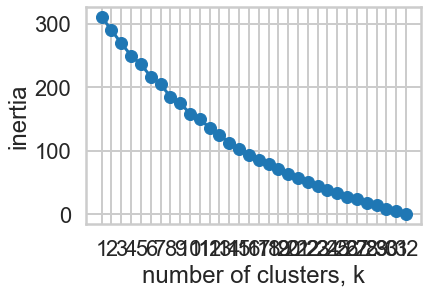

In [43]:
# from sklearn.cluster import KMeans
# # from matplotlib.pyplot import figure

# # fig=plt.figure()

# ks=range(1,33)
# inertias=[]

# for k in ks:
#     model = KMeans(n_clusters=k)
#     model.fit(dummy_df_X)
#     inertias.append(model.inertia_)
#     # labels = model.predict(dummy_df)

# plt.plot(ks, inertias, '-o')
# plt.xlabel('number of clusters, k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# # plt.figure(figsize=(20,5))
# # figure(figsize=(15,15))
# # fig.subplots_adjust(right=1)
# # plt.tight_layout()
# plt.show()

In [ ]:
#sorry excuse the labels! could not figure out easy way to spread it out /
#make it wider =__=
#but yeah - THIS IS REALLY TOUGH! very different than the elbow charts we've seen
# - NO CLEAR *KINK* IN THE CURVE! the decay does slow down but it's very gradual!
#so it's really hard to say! but probably after 14 or so, but tough/feels weird
#because you can see it still clearly keeps dropping right till the end!
#never really 'flattens out'!!
#that's why i went ALL THE WAY TO END, just to see if it ever plateaued but
#it doesn't!

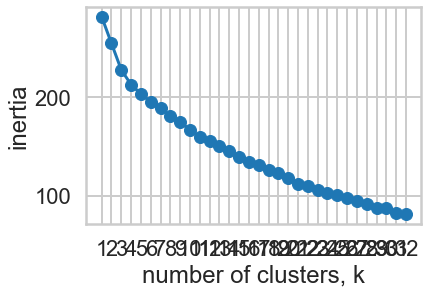

In [280]:
#THE RIGHT WAY!
from sklearn.cluster import KMeans

ks=range(1,33)
inertias=[]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(dummy_pivot_MASTER)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

In [ ]:
#aH worked but similar problem - i mean there IS more of a kink in the very
#beginning, like @ k=3 seems ideal, but say that w/ a very heavy heart tho
#lol cuz again still SOOOO much left to 'lose' lol in a GOOD way lol/which is
#a GOOD thing!!! meaning it's GOOD to go and 'lose' that / get/*CHASE THE LOSS!*

#### 3aii. Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

**Hint**: Scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

In [52]:
dummy_df_X.astype(int)

offer_id_1  offer_id_2  offer_id_3  offer_id_4  offer_id_5  offer_id_6  \
0             0           1           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   
..          ...         ...         ...         ...         ...         ...   
319           0           0           0           0           0           0   
320           0           0           0           0           0           0   
321           0           0           0           0           0           0   
322           0           0           0           0           0           0   
323           0           0           0           0           0           0   

     offer_id_7  offer_id_8  offer_id_9  offer_id_10  ...  offer_id_23  \
0             0           0           0            0  ...            0   
1             0           0           0            0  ...            0   
2             0           0           0            0  ...            0   
3             0           0           0            0  ...            0   
4             0           0           0            0  ...            0   
..          ...         ...         ...          ...  ...          ...   
319           0           0           0            0  ...            0   
320           0           0           0            0  ...            0   
321           0           0           0            0  ...            0   
322           0           0           0            0  ...            0   
323           0           0           0            0  ...            0   

     offer_id_24  offer_id_25  offer_id_26  offer_id_27  offer_id_28  \
0              0            0            0            0            0   
1              1            0            0            0            0   
2              0            0            0            0            0   
3              1            0            0            0            0   
4              0            0            1            0            0   
..           ...          ...          ...          ...          ...   
319            0            0            0            0            0   
320            0            0            0            0            0   
321            0            0            0            0            1   
322            0            0            0            0            0   
323            0            0            0            0            0   

     offer_id_29  offer_id_30  offer_id_31  offer_id_32  
0              0            0            0            0  
1              0            0            0            0  
2              0            0            0            0  
3              0            0            0            0  
4              0            0            0            0  
..           ...          ...          ...          ...  
319            0            0            0            0  
320            0            0            0            0  
321            0            0            0            0  
322            0            1            0            0  
323            0            0            1            0  

[324 rows x 32 columns]

In [53]:
dummy_df_X.astype(int).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   offer_id_1   324 non-null    int64
 1   offer_id_2   324 non-null    int64
 2   offer_id_3   324 non-null    int64
 3   offer_id_4   324 non-null    int64
 4   offer_id_5   324 non-null    int64
 5   offer_id_6   324 non-null    int64
 6   offer_id_7   324 non-null    int64
 7   offer_id_8   324 non-null    int64
 8   offer_id_9   324 non-null    int64
 9   offer_id_10  324 non-null    int64
 10  offer_id_11  324 non-null    int64
 11  offer_id_12  324 non-null    int64
 12  offer_id_13  324 non-null    int64
 13  offer_id_14  324 non-null    int64
 14  offer_id_15  324 non-null    int64
 15  offer_id_16  324 non-null    int64
 16  offer_id_17  324 non-null    int64
 17  offer_id_18  324 non-null    int64
 18  offer_id_19  324 non-null    int64
 19  offer_id_20  324 non-null    int64
 20  offer_id_2

In [54]:
dummy_df_X2 = dummy_df_X.astype(int)

In [63]:
#ohhh, okay - i think actually problem is that we
#needa make our dummy_df_X BACK INTO AN *ARRAY*!!!!
dummy_X_array = dummy_df_X.to_numpy()
dummy_X_array[:3]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [65]:
#hmmm, still giving me error - maybe DO needa ALSO conv to ints, cuz you see
#the same 'uint8' data type carried over

dummy_X_array2 = dummy_df_X2.to_numpy()
dummy_X_array2[:3]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [69]:
print(dummy_X_array2[:3])

[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [75]:
dummy_X_array2.shape

(324, 32)

TypeError: '<=' not supported between instances of 'str' and 'int'

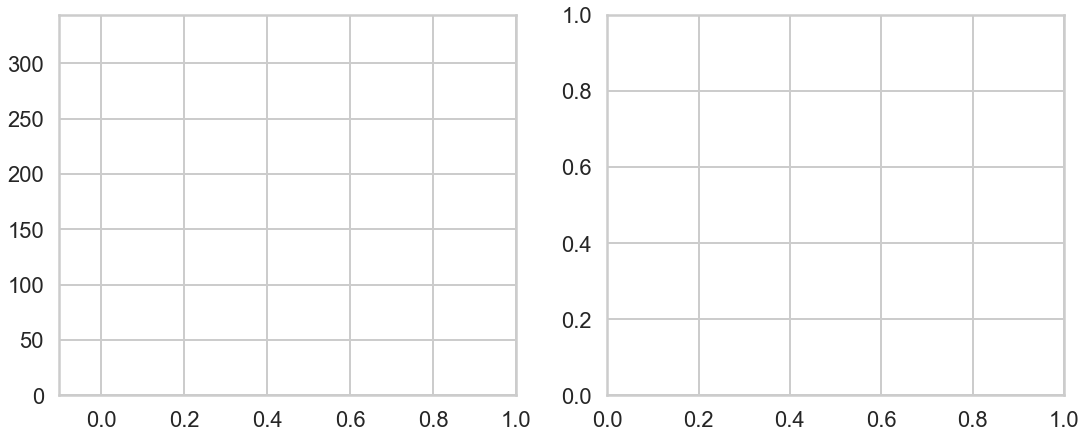

In [66]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

 
range_n_clusters = range(1,33)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=1)
    cluster_labels = clusterer.fit_predict(dummy_X_array2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummy_X_array2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.10301054099503282
For n_clusters = 3 The average silhouette_score is : 0.1630640130046972
For n_clusters = 4 The average silhouette_score is : 0.21738722245692754
For n_clusters = 5 The average silhouette_score is : 0.2713529856386969
For n_clusters = 6 The average silhouette_score is : 0.3276794493608627
For n_clusters = 7 The average silhouette_score is : 0.35106263036247576
For n_clusters = 8 The average silhouette_score is : 0.4261178276722301
For n_clusters = 9 The average silhouette_score is : 0.46255371393492795
For n_clusters = 10 The average silhouette_score is : 0.5016901822457366
For n_clusters = 11 The average silhouette_score is : 0.5432900432900423
For n_clusters = 12 The average silhouette_score is : 0.579290558163797
For n_clusters = 13 The average silhouette_score is : 0.6122891339176322
For n_clusters = 14 The average silhouette_score is : 0.6396984416110096
For n_clusters = 15 The average silhouette_score is : 0.

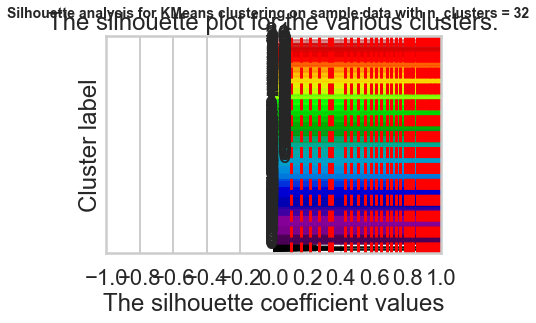

In [84]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

 
range_n_clusters = range(2,33)

for n_clusters in range_n_clusters:
    # Create subplot
    # fig, ax, = plt.subplots()
    # fig.set_size_inches(18, 7)

    # The subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    # ax1.set_xlim([-1, 1])
    plt.xlim([-1,1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    # ax1.set_ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])
    plt.ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])


    # Initialize the clusterer with n_clusters value and a random generator
    # seed for reproducibility
    # clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=1)
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_X_array2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dummy_X_array2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dummy_X_array2, cluster_labels)
##################################################
    y_lower = 10 #WHAT'S THIS? WHY 10? is that for that '+10' we used for spacing?
##################################################
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        ##################################################
        y_lower = y_upper + 10  # 10 for the 0 samples
        #hain? '0 samples'? is this +10 also related to the y_lower=10 and/or +10 buffer?
        ##################################################

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(
    #     dummy_X_array2[:, 0], dummy_X_array2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(
    #     centers[:, 0],
    #     centers[:, 1],
    #     marker="o",
    #     c="white",
    #     alpha=1,
    #     s=200,
    #     edgecolor="k",
    # )

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
#INTERESTING! so for this one the score just keeps getting
#HIGHER AND HIGHER till it gets to a perfect 1 w/ fitting on EVERY
#feature!
#but hold on - fitting on every FEATURE is different than fitting on every POINT!
#oh but wait - maybe it's different when each feature is BINARY?!? didn't really
#talk about that?!?
################################################################################

For n_clusters = 2 The average silhouette_score is : 0.10301054099503282


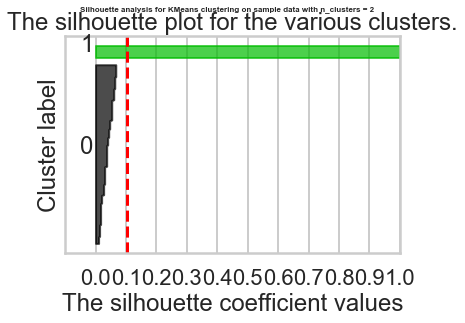

For n_clusters = 3 The average silhouette_score is : 0.1630640130046972


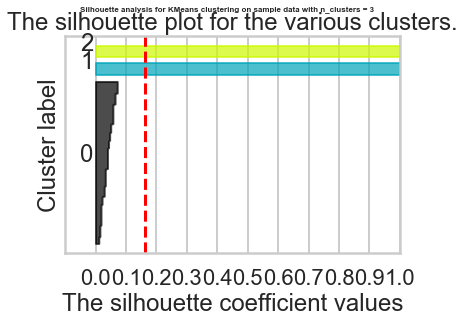

For n_clusters = 4 The average silhouette_score is : 0.21738722245692754


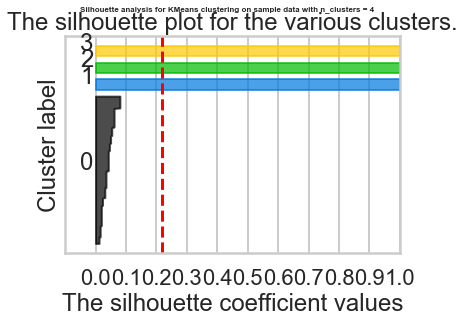

For n_clusters = 5 The average silhouette_score is : 0.2713529856386969


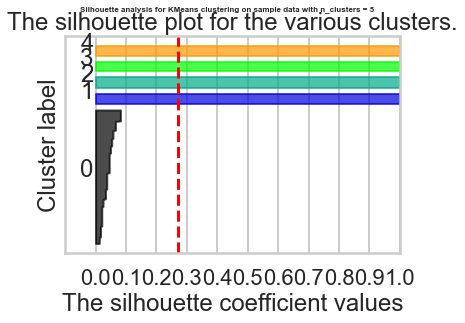

For n_clusters = 6 The average silhouette_score is : 0.3276794493608627


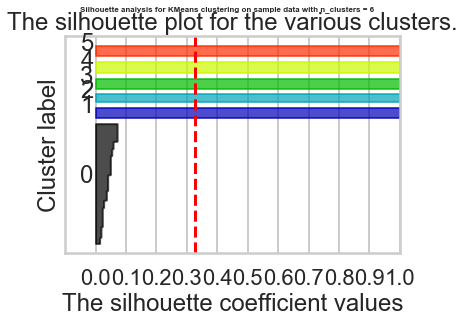

For n_clusters = 7 The average silhouette_score is : 0.35106263036247576


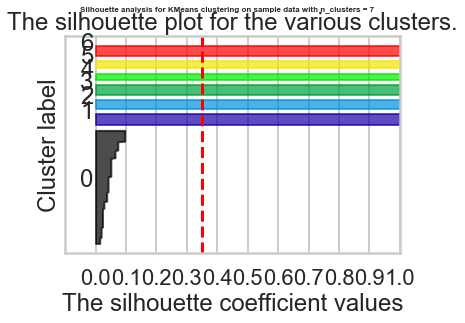

For n_clusters = 8 The average silhouette_score is : 0.4261178276722301


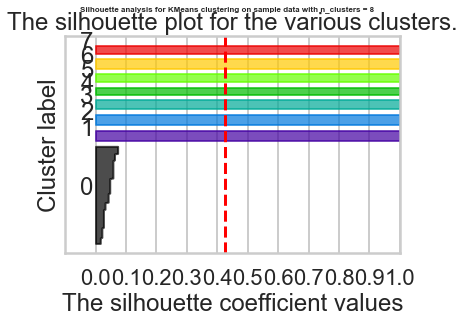

For n_clusters = 9 The average silhouette_score is : 0.46255371393492795


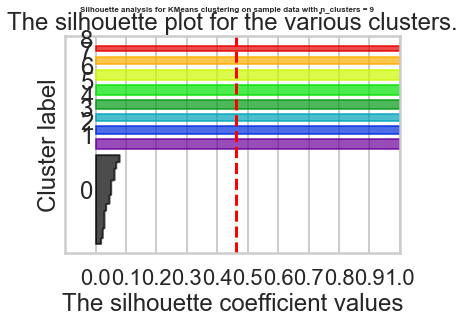

For n_clusters = 10 The average silhouette_score is : 0.5016901822457366


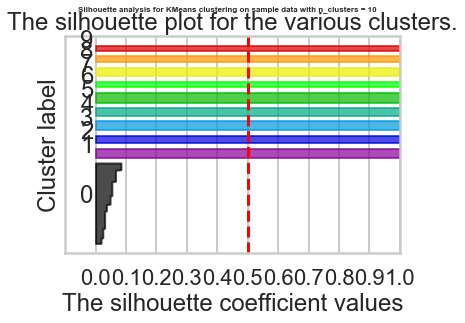

In [109]:
#let's try a LIMITED range like they suggested!
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

 
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    plt.xlim([-.1,1])

    # plt.ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    # clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_X_array2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    #SO THIS IS THE *AVERAGE* SCORE FOR *ALL* SAMPLES FOR/@ THIS k CUZ REMEM -
    #SILHOUETTE IS CALCULATED FOR *EACH INDIVIDUAL SAMPLE*!!!!
    ###############################################################
    silhouette_avg = silhouette_score(dummy_X_array2, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    #LIKE LITERALLY FOR EACH *INDIVIDUAL* SAMPLE
    ###############################################################
    sample_silhouette_values = silhouette_samples(dummy_X_array2, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        #ohh, okay, so this aggregates all the samples in this k run that got
        #labeled @/for EACH label, 0 thru k-1

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    # plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xticks([0, 0.1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9, 1])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=8,
        fontweight="bold")

    plt.show()

In [ ]:
#confused - not sure why ALL besides 0 look the way they do? go ALL the way to the end?
#so they're calling the silhouette_score the silhouette_AVERAGE -
#but then, so what do the bars of the PLOT mean?
#is it cuz we didn't do n_init='auto'? cuz it always gave that error
#when we did that

In [110]:
sample_silhouette_values

array([0.05357143, 1.        , 0.03571429, 1.        , 0.08333333,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.06547619, 0.03571429, 0.04761905,
       0.0297619 , 1.        , 0.02380952, 1.        , 0.02380952,
       1.        , 0.0297619 , 0.04761905, 0.0297619 , 0.05357143,
       0.08333333, 1.        , 1.        , 0.02380952, 0.0297619 ,
       0.0297619 , 1.        , 0.08333333, 1.        , 1.        ,
       1.        , 1.        , 0.05357143, 0.06547619, 0.05357143,
       1.        , 0.04761905, 0.08333333, 0.0297619 , 1.        ,
       0.03571429, 1.        , 0.05357143, 1.        , 0.0297619 ,
       0.05357143, 0.05357143, 1.        , 0.0297619 , 1.        ,
       0.05357143, 0.02380952, 0.0297619 , 1.        , 0.04761905,
       1.        , 0.0297619 , 1.        , 0.05357143, 1.        ,
       0.0297619 , 0.02380952, 0.04761905, 0.0297619 , 0.06547619,
       0.06547619, 1.        , 0.04761905, 0.05357143, 1.     

In [111]:
ith_cluster_silhouette_values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
#for the 1st iteration that was causing the error, ie @ k=1!
# cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
# len(cluster_labels)

324

In [ ]:
#hmmm, so it's grouping all things in the SAME class??
#OHHHH! Alhamdulillah Allah gave me a right idea! That's only the case
#ofc if literally we MAKE k=1!!!!! that's why it was saying it needs more than
#1 label AND THAT'S WHY THEY STARTED W/ K=2 FIRST!!!! I JUST THOUGHT IT WAS CUZ
#IT DOESN'T MAKE SENSE TO LOOK AT K=1 SO THEY WERE JUST BEING SMART AND *SKIPPED*
#IT AND I TOO THOUGHT YEAH WHY NOT DO THAT BUT IN DATACAMP & HARVARD THEY ALWAYS
#*KEPT* IT LOL SO I JUST HAD TO LEARN TO REMEMBER TO *IGNORE* IT!! but then i
#actually came to like it cuz it helped to give the full shape and accentuate
#the CURVE / DESCENT!!

In [ ]:
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import numpy as np

# # Generating the sample data from make_blobs
# # This particular setting has one distinct cluster and 3 clusters placed close
# # together.
# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

# range_n_clusters = [2, 3, 4, 5, 6]

# for n_clusters in range_n_clusters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # The 1st subplot is the silhouette plot
#     # The silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = clusterer.fit_predict(X)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(
#         X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
#     )

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(
#         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()

For n_clusters = 3 The average silhouette_score is : 0.1630640130046972


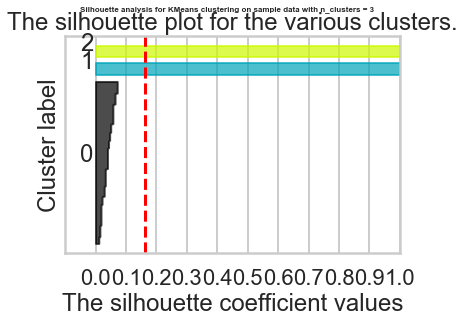

In [122]:
#lemme maybe try JUST 1!

n_clusters=3

plt.xlim([-.1,1])

# plt.ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=n_clusters, random_state=1)
# clusterer = KMeans(n_clusters=n_clusters, random_state=1)

cluster_labels = clusterer.fit_predict(dummy_X_array2)

silhouette_avg = silhouette_score(dummy_X_array2, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(dummy_X_array2, cluster_labels)

y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]


    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot

    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks ##MIGHT be able to get away w/o this one?
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, .5, .6, .7, .8, .9, 1])


plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=8,
    fontweight="bold")

plt.show()

In [123]:
ith_cluster_silhouette_values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [128]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,

In [127]:
sample_silhouette_values#[cluster_labels == 2]

array([0.03202847, 0.03914591, 0.02135231, 0.03914591, 0.04982206,
       0.04626335, 0.07117438, 0.0569395 , 0.06405694, 0.0569395 ,
       1.        , 1.        , 0.03914591, 0.02135231, 0.02846975,
       0.01779359, 0.07117438, 0.01423488, 0.0569395 , 0.01423488,
       0.07117438, 0.01779359, 0.02846975, 0.01779359, 0.03202847,
       0.04982206, 1.        , 1.        , 0.01423488, 0.01779359,
       0.01779359, 0.03914591, 0.04982206, 0.06405694, 0.04626335,
       0.0569395 , 1.        , 0.03202847, 0.03914591, 0.03202847,
       0.04270463, 0.02846975, 0.04982206, 0.01779359, 0.0569395 ,
       0.02135231, 0.03914591, 0.03202847, 0.04270463, 0.01779359,
       0.03202847, 0.03202847, 0.04270463, 0.01779359, 0.07117438,
       0.03202847, 0.01423488, 0.01779359, 1.        , 0.02846975,
       0.07117438, 0.01779359, 1.        , 0.03202847, 0.04270463,
       0.01779359, 0.01423488, 0.02846975, 0.01779359, 0.03914591,
       0.03914591, 0.07117438, 0.02846975, 0.03202847, 0.05693

In [130]:
sample_silhouette_values[cluster_labels == 0]

array([0.03202847, 0.03914591, 0.02135231, 0.03914591, 0.04982206,
       0.04626335, 0.07117438, 0.0569395 , 0.06405694, 0.0569395 ,
       0.03914591, 0.02135231, 0.02846975, 0.01779359, 0.07117438,
       0.01423488, 0.0569395 , 0.01423488, 0.07117438, 0.01779359,
       0.02846975, 0.01779359, 0.03202847, 0.04982206, 0.01423488,
       0.01779359, 0.01779359, 0.03914591, 0.04982206, 0.06405694,
       0.04626335, 0.0569395 , 0.03202847, 0.03914591, 0.03202847,
       0.04270463, 0.02846975, 0.04982206, 0.01779359, 0.0569395 ,
       0.02135231, 0.03914591, 0.03202847, 0.04270463, 0.01779359,
       0.03202847, 0.03202847, 0.04270463, 0.01779359, 0.07117438,
       0.03202847, 0.01423488, 0.01779359, 0.02846975, 0.07117438,
       0.01779359, 0.03202847, 0.04270463, 0.01779359, 0.01423488,
       0.02846975, 0.01779359, 0.03914591, 0.03914591, 0.07117438,
       0.02846975, 0.03202847, 0.0569395 , 0.03914591, 0.03914591,
       0.06405694, 0.01423488, 0.07117438, 0.02846975, 0.03914

In [131]:
sample_silhouette_values[cluster_labels == 1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [132]:
sample_silhouette_values[cluster_labels == 2]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [ ]:
#okay so NON-Zero labels, so like 1 & 2, were only given to sample silhouette
#values of *1*!!!

In [ ]:
#OHHH - yeah, okay, i see - so that's why were seeing that
#the non-zero labels, of 1 thru k-1, their WHOLE profile/distribution
#of silhouette values is ONLY SILHOUETTE VALUES OF 1!!!!

In [138]:
clusterer = KMeans(n_clusters=n_clusters, n_init='auto',random_state=1)

cluster_labels = clusterer.fit_predict(dummy_X_array)

silhouette_samples(dummy_X_array, cluster_labels)[cluster_labels==2]

TypeError: '<=' not supported between instances of 'str' and 'int'

In [139]:
clusterer = KMeans(n_clusters=n_clusters, n_init='auto',random_state=1)

cluster_labels = clusterer.fit_predict(dummy_X_array)

silhouette_samples(dummy_X_array, cluster_labels)[cluster_labels==2]

TypeError: '<=' not supported between instances of 'str' and 'int'

In [148]:
#tried it w/ also specifying 'init' arg to both random & k++ since doc mentioned but same issue
clusterer = KMeans(n_clusters=n_clusters, n_init='auto',init='random',random_state=1)

cluster_labels = clusterer.fit_predict(dummy_X_array)

silhouette_samples(dummy_X_array, cluster_labels)[cluster_labels==2]

TypeError: '<=' not supported between instances of 'str' and 'int'

In [137]:
dummy_X_array

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [140]:
silhouette_samples(dummy_X_array,cluster)

NameError: name 'cluster' is not defined

In [142]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

X.shape

(500, 2)

In [143]:
X.dtype

dtype('float64')

In [144]:
type(X)

numpy.ndarray

In [145]:
dummy_X_array2.dtype

dtype('int64')

In [146]:
type(dummy_X_array2)

numpy.ndarray

In [152]:
#tried several things like this to see if any other way they might've been
#looking for to get df to 'matrix' aka numpy array but all deprecated.
#looks like i did it the right way

# dummy_X_mtx = np.asmatrix(dummy_df_X)

# clusterer = KMeans(n_clusters=n_clusters, n_init='auto',init='random',random_state=1)

# cluster_labels = clusterer.fit_predict(np.asmatrix(dummy_X_mtx))

# silhouette_samples(dummy_X_mtx, cluster_labels)[cluster_labels==2]

In [ ]:
########################################################################

For n_clusters = 2 The average silhouette_score is : 0.09174871508750351


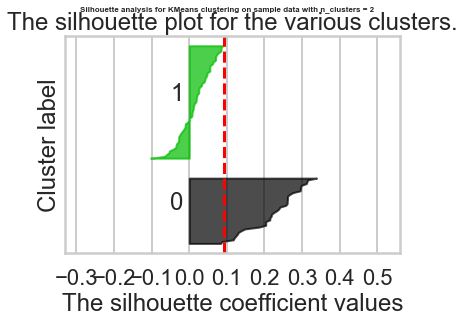

For n_clusters = 3 The average silhouette_score is : 0.11889942863638556


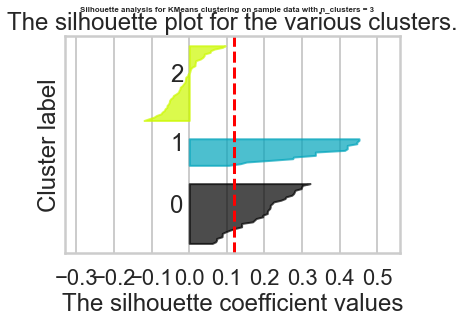

For n_clusters = 4 The average silhouette_score is : 0.12167039851355937


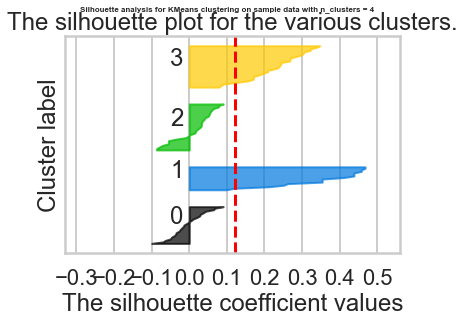

For n_clusters = 5 The average silhouette_score is : 0.13528618244904822


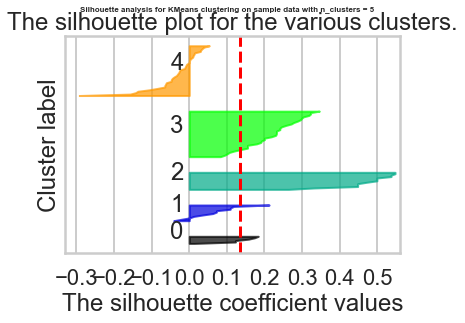

For n_clusters = 6 The average silhouette_score is : 0.13218209978013543


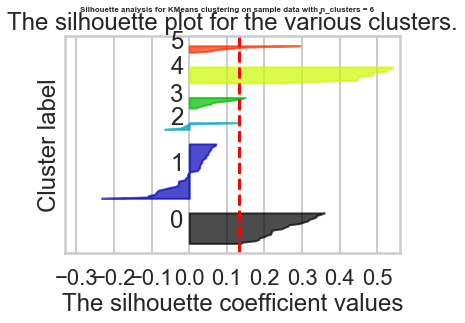

For n_clusters = 7 The average silhouette_score is : 0.13365227784322317


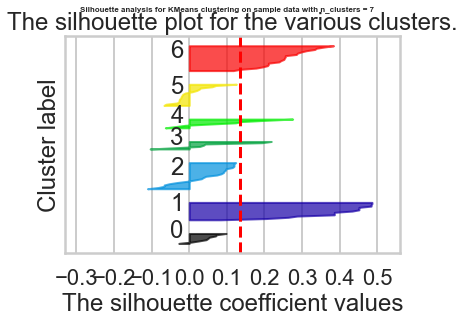

For n_clusters = 8 The average silhouette_score is : 0.12482407120722075


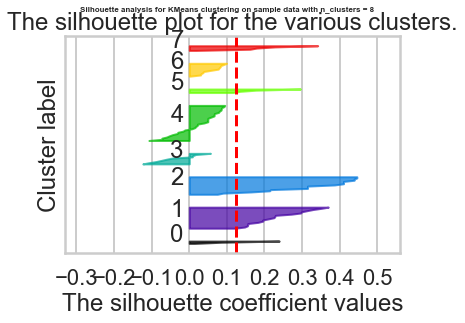

For n_clusters = 9 The average silhouette_score is : 0.11686562917000483


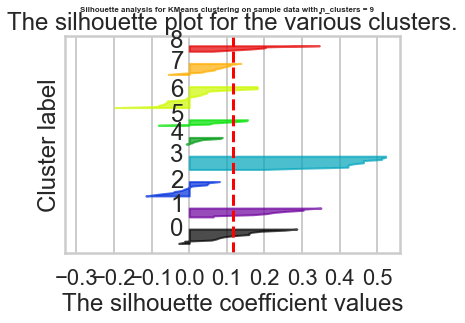

For n_clusters = 10 The average silhouette_score is : 0.10889477148379977


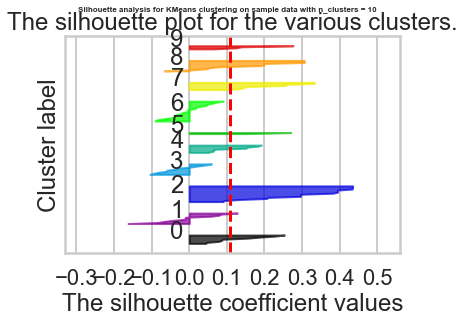

In [292]:
#USING OUR CORRECTED DF!!!

#first convert to array lol

dummy_pivot_MASTER_array = dummy_pivot_MASTER.to_numpy()
#aH! i like how it BUMPS TO TOP the match that i guess it predicts
#you actually WANT based on i guess frequent/recent use!!! cuz soo many
#dummys but this is the new one of choice!!!! and it knowwwwwsssss! aH!

 
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    plt.xlim([-.33,.56])

    # plt.ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    # clusterer = KMeans(n_clusters=n_clusters, n_init='auto',random_state=1)
    #lol DANNNNGG IT! this^ n_init auto still doesn't work even w/ everything else (iA) being right

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    #SO THIS IS THE *AVERAGE* SCORE FOR *ALL* SAMPLES FOR/@ THIS k CUZ REMEM -
    #SILHOUETTE IS CALCULATED FOR *EACH INDIVIDUAL SAMPLE*!!!!
    ###############################################################
    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg)

    # Compute the silhouette scores for each sample
    #LIKE LITERALLY FOR EACH *INDIVIDUAL* SAMPLE
    ###############################################################
    sample_silhouette_values = silhouette_samples(dummy_pivot_MASTER_array, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    # plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xticks([-.3, -.2, -.1, 0, .1, .2, .3, .4, .5])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=8,
        fontweight="bold")

    plt.show()

In [ ]:
#SUBHANALLAH WA BI HAMDI SUBHANALLAHIL 'AUDHEEM!!!!!!!!!!!!!!!!!!!
#LAA ILLAHA ILLA ANT, SUBHANAK, INNEE KUNTU MIN-ADH-DHAALIMEEN!!!!!!!!!!!!!!

In [294]:
#let's look at JUST the list of scores!

range_n_clusters = range(2,33)

for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)

    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)
    
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.09174871508750351
For n_clusters = 3 The average silhouette_score is : 0.11889942863638556
For n_clusters = 4 The average silhouette_score is : 0.12167039851355937
For n_clusters = 5 The average silhouette_score is : 0.13528618244904822
For n_clusters = 6 The average silhouette_score is : 0.13218209978013543
For n_clusters = 7 The average silhouette_score is : 0.13365227784322317
For n_clusters = 8 The average silhouette_score is : 0.12482407120722075
For n_clusters = 9 The average silhouette_score is : 0.11686562917000483
For n_clusters = 10 The average silhouette_score is : 0.10889477148379977
For n_clusters = 11 The average silhouette_score is : 0.1286779208894978
For n_clusters = 12 The average silhouette_score is : 0.13343099846782644
For n_clusters = 13 The average silhouette_score is : 0.12245338425177626
For n_clusters = 14 The average silhouette_score is : 0.14891411990661507
For n_clusters = 15 The average silhouette_scor

In [304]:
#okay let's see what the best is!

range_n_clusters = range(2,33)

k = []
silhouette_averages=[]


for n_clusters in range_n_clusters:

    k.append(n_clusters)

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)

    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)

    silhouette_averages.append(silhouette_avg)


df = pd.DataFrame({'k':k, 'silhouette_average':silhouette_averages})
df.query( 'silhouette_average == silhouette_average.max()' )

k  silhouette_average
12  14            0.148914

In [ ]:
#oh wait lol - just realized - does it even work that way where the
#'best' is the HIGHEST or am i just ASSHYUMING?!? lol

#OK so aH yes it seems so - and i assume we DO go by highest AVERAGE silhou score,
#not highest ABSO/SINGLE!
#remember these are like DISTS so that's why you see them KRAGGLY jutting out!
#lol look like a cruise ship/cruiseliner or train!
#but yeah seems like pretty LOW averages! even tho some jut out towards
#a good bit higher
#but even the highest ABSO silhou scores aren't that high...
#and remem some are NEGATIVE!
#why's that?? >> OH YEAH!! Documentation says: "Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar."
#got it!

#but remem what silhou skcore is (lol) (what was that kanadian kandy?chokkalat bar lol, Skor?) chocklit
#EVERY SINGLE POINT has a score. it looks at:
    #(a)how close the point is to ALL POINTS IN *ITS* CLUSTER - so this point we
        #WANT to be LOW! lower the better
    #(b)the MINIMUM of the AVERAGE distance to each OTHER cluster
        #(meaning, it takes the distance to all points OUTSIDE of its cluster,
        #and for all points of a single cluster, it gets the AVERAGE distance
        #for those, and then takes the MINIMUM of those averages! sound like
        #the 'SINGLE' measurement method in Hierarchical Clustering!!!!!)
        #so this value we WANT to be high - higher the better
    #this subtracts the first in the numerator (b-a), so we want the numerator to be HIGH
    #then the denom is simply the GREATER of these two^
        #which means that SHOULD be b
    #thus, as b got higher and a got lower, a would essentially become 0
    #and/thus this equation (b-a)/b would basically become b/b ≈ 1!!!!!
    #HENCE WHY 1 IS THE *IDEAL* / BEST!!!!!
    #and remember it's SPECIFICALLY *+1* aka POSITIVE 1!!!!
    #not 'equivalent' cuz of magnitude like in other applications! lol
    #negative is ALWAYS BAD!!!
    #don't know if like the HIGHER mag the negative the worse?
    #Like is -1 worst or *0*??????
    ###############################################################

In [ ]:
#should i drop index? lol

For n_clusters = 2 The average silhouette_score is : 0.09174871508750351


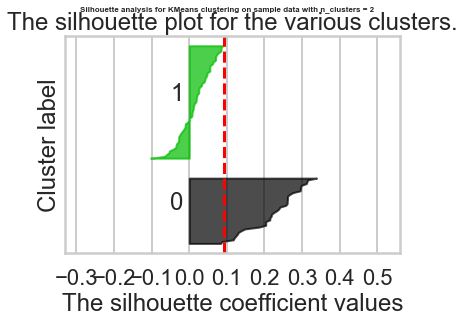

For n_clusters = 3 The average silhouette_score is : 0.11889942863638556


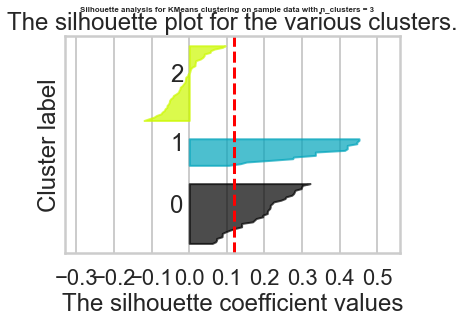

For n_clusters = 4 The average silhouette_score is : 0.12167039851355937


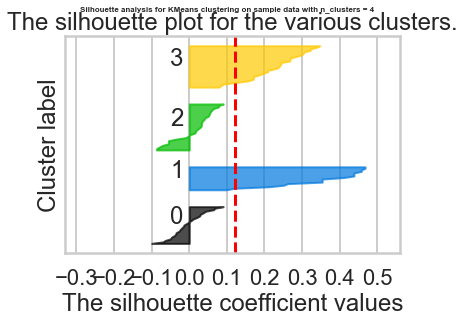

For n_clusters = 5 The average silhouette_score is : 0.13528618244904822


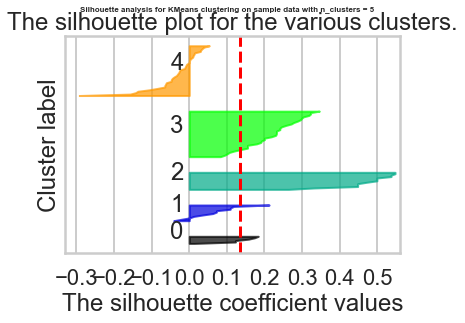

For n_clusters = 6 The average silhouette_score is : 0.13218209978013543


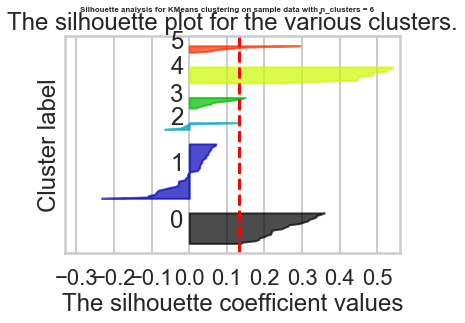

For n_clusters = 7 The average silhouette_score is : 0.13365227784322317


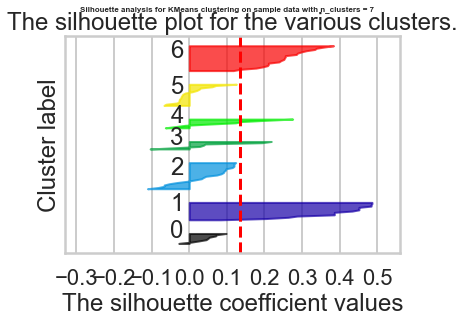

For n_clusters = 8 The average silhouette_score is : 0.12482407120722075


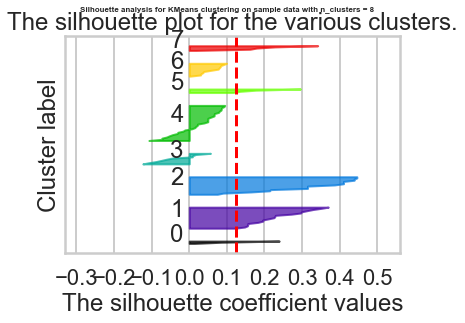

For n_clusters = 9 The average silhouette_score is : 0.11686562917000483


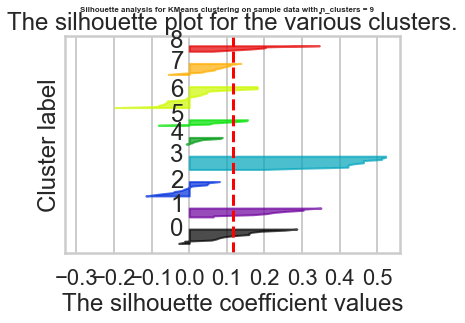

For n_clusters = 10 The average silhouette_score is : 0.10889477148379977


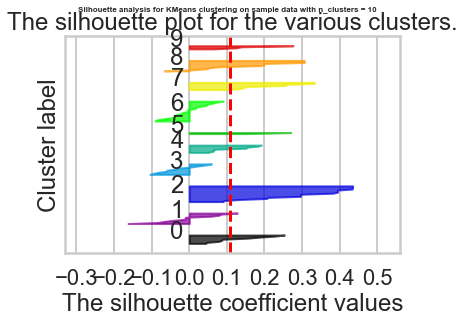

For n_clusters = 11 The average silhouette_score is : 0.1286779208894978


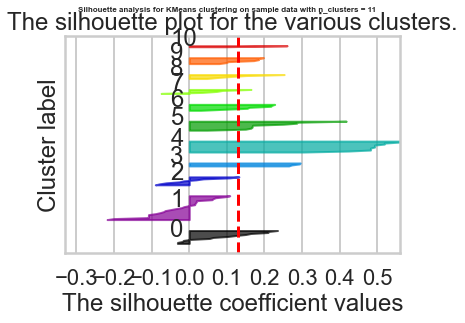

For n_clusters = 12 The average silhouette_score is : 0.13343099846782644


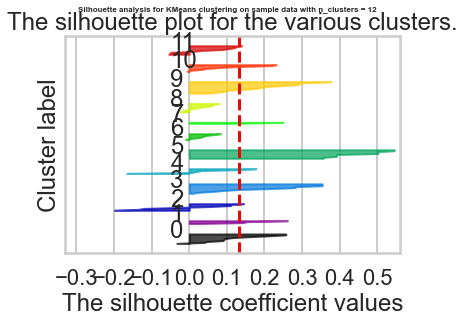

For n_clusters = 13 The average silhouette_score is : 0.12245338425177626


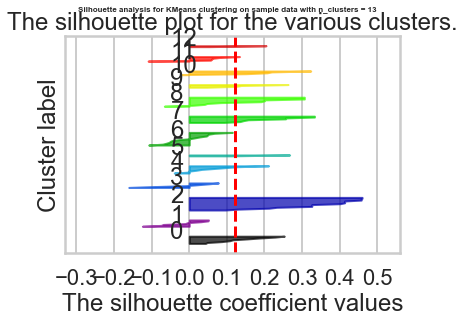

For n_clusters = 14 The average silhouette_score is : 0.14891411990661507


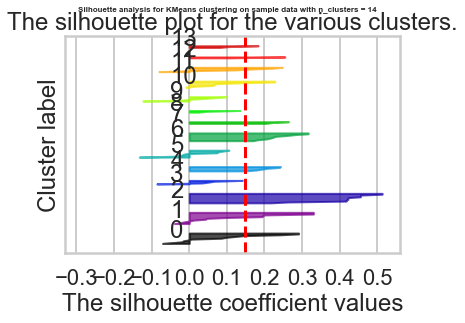

For n_clusters = 15 The average silhouette_score is : 0.12820342411206484


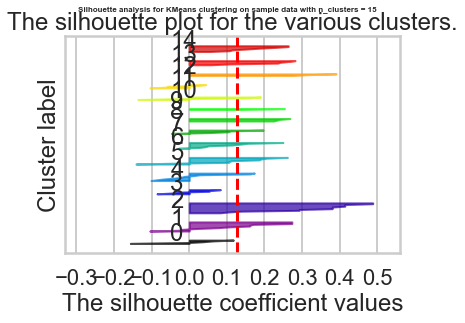

For n_clusters = 16 The average silhouette_score is : 0.14228498256022612


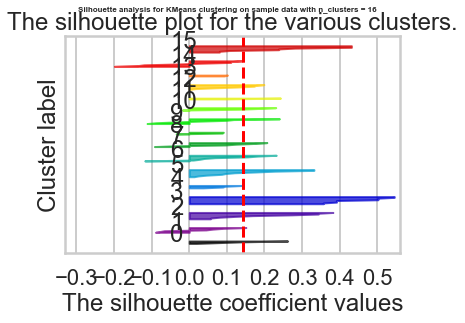

For n_clusters = 17 The average silhouette_score is : 0.1311703875908173


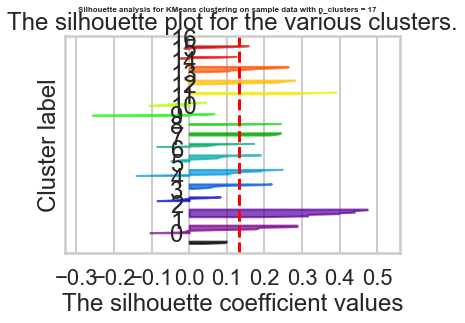

For n_clusters = 18 The average silhouette_score is : 0.12814092964696572


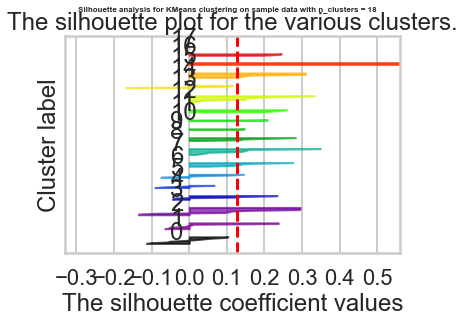

For n_clusters = 19 The average silhouette_score is : 0.13726449480720382


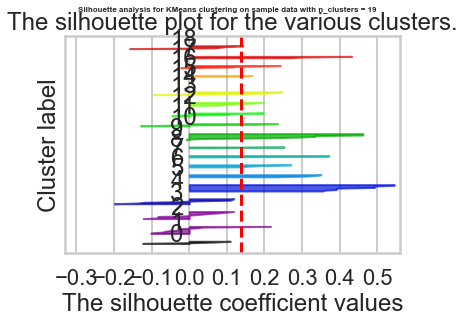

For n_clusters = 20 The average silhouette_score is : 0.13019931912638144


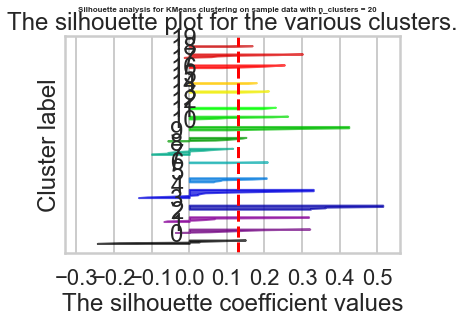

For n_clusters = 21 The average silhouette_score is : 0.12179096415791235


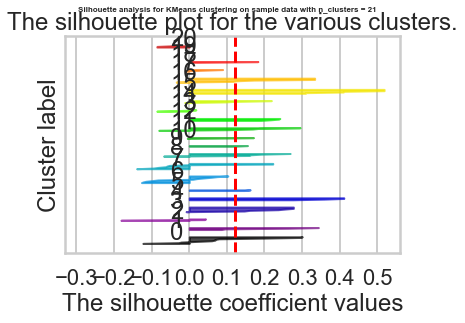

For n_clusters = 22 The average silhouette_score is : 0.14522472271471973


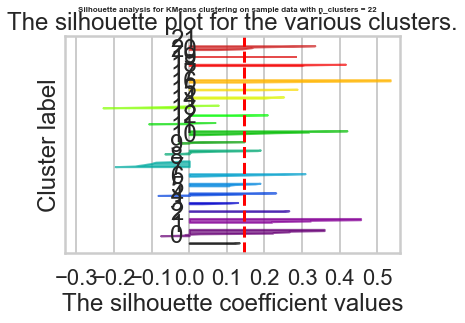

For n_clusters = 23 The average silhouette_score is : 0.10851112867170816


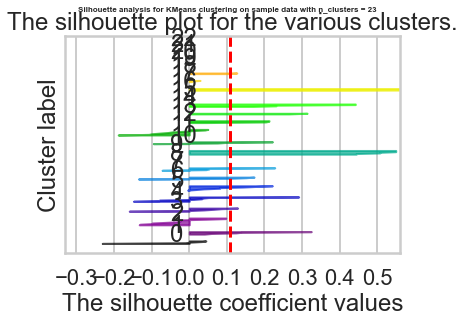

For n_clusters = 24 The average silhouette_score is : 0.1310073952675098


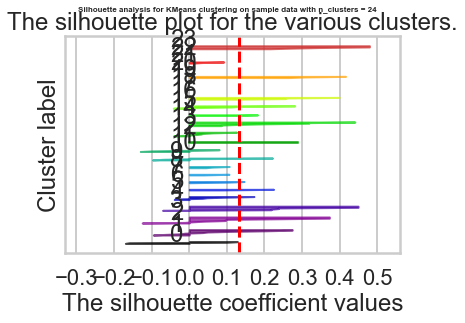

For n_clusters = 25 The average silhouette_score is : 0.1379133695147251


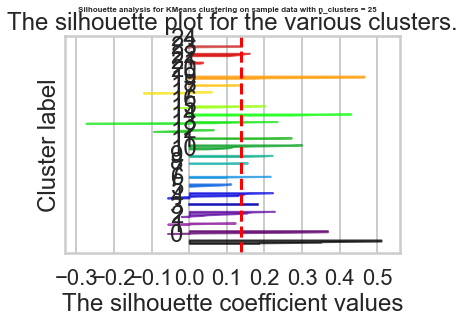

For n_clusters = 26 The average silhouette_score is : 0.12322101832615637


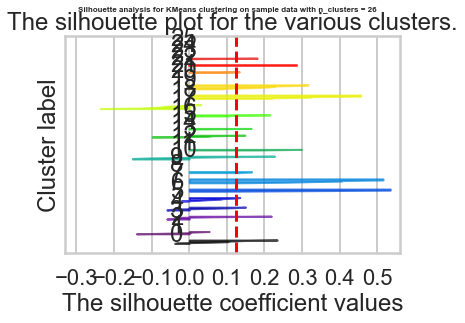

For n_clusters = 27 The average silhouette_score is : 0.13192867171390793


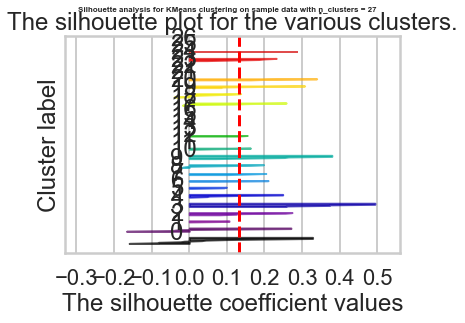

For n_clusters = 28 The average silhouette_score is : 0.13002384154801436


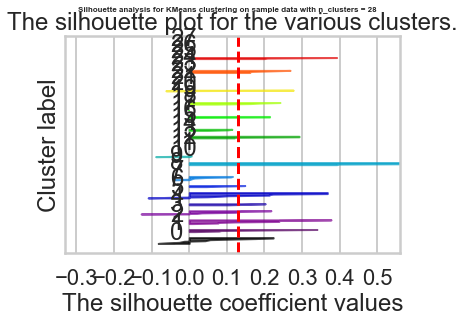

For n_clusters = 29 The average silhouette_score is : 0.1351543158719866


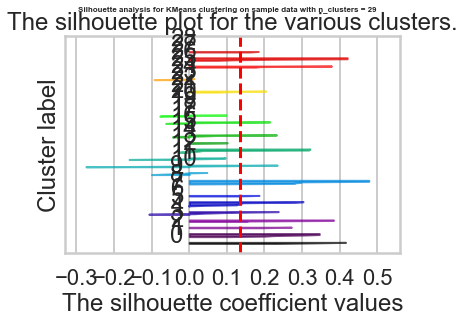

For n_clusters = 30 The average silhouette_score is : 0.1319821395848968


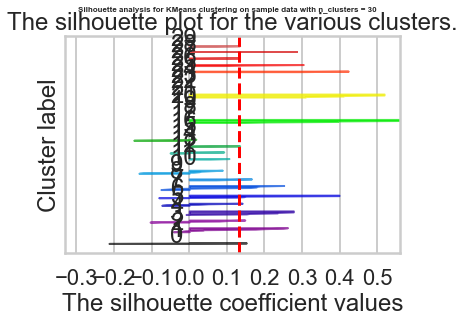

For n_clusters = 31 The average silhouette_score is : 0.14188745008341053


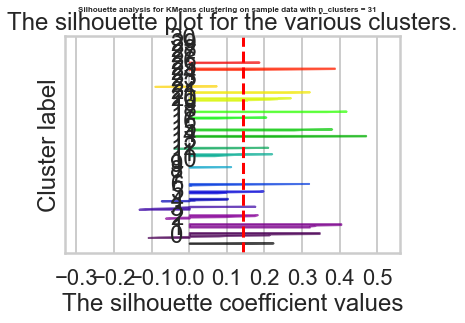

For n_clusters = 32 The average silhouette_score is : 0.14164352541560132


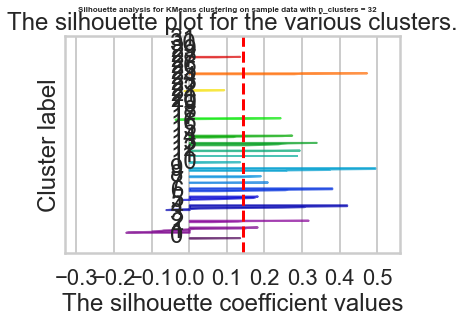

In [305]:
#oh - but remem! they only wanted us to do like k2 - 11 lol (eyyy 'K2' is the PEAK!!!),
#so woulda just missed the bester/topper of k=14!!
#maybe we should look at all!
#USING OUR CORRECTED DF!!!

#first convert to array lol

dummy_pivot_MASTER_array = dummy_pivot_MASTER.to_numpy()
#aH! i like how it BUMPS TO TOP the match that i guess it predicts
#you actually WANT based on i guess frequent/recent use!!! cuz soo many
#dummys but this is the new one of choice!!!! and it knowwwwwsssss! aH!

 
range_n_clusters = range(2,33)

for n_clusters in range_n_clusters:
    plt.xlim([-.33,.56])

    # plt.ylim([0, len(dummy_X_array2) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    # clusterer = KMeans(n_clusters=n_clusters, n_init='auto',random_state=1)
    #lol DANNNNGG IT! this^ n_init auto still doesn't work even w/ everything else (iA) being right

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    #SO THIS IS THE *AVERAGE* SCORE FOR *ALL* SAMPLES FOR/@ THIS k CUZ REMEM -
    #SILHOUETTE IS CALCULATED FOR *EACH INDIVIDUAL SAMPLE*!!!!
    ###############################################################
    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg)

    # Compute the silhouette scores for each sample
    #LIKE LITERALLY FOR EACH *INDIVIDUAL* SAMPLE
    ###############################################################
    sample_silhouette_values = silhouette_samples(dummy_pivot_MASTER_array, cluster_labels)
    
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    # plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xticks([-.3, -.2, -.1, 0, .1, .2, .3, .4, .5])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=8,
        fontweight="bold")

    plt.show()


In [303]:
df

k  silhouette_average
0    2            0.091749
1    3            0.118899
2    4            0.121670
3    5            0.135286
4    6            0.132182
5    7            0.133652
6    8            0.124824
7    9            0.116866
8   10            0.108895
9   11            0.128678
10  12            0.133431
11  13            0.122453
12  14            0.148914
13  15            0.128203
14  16            0.142285
15  17            0.131170
16  18            0.128141
17  19            0.137264
18  20            0.130199
19  21            0.121791
20  22            0.145225
21  23            0.108511
22  24            0.131007
23  25            0.137913
24  26            0.123221
25  27            0.131929
26  28            0.130024
27  29            0.135154
28  30            0.131982
29  31            0.141887
30  32            0.141644

In [310]:
df.sort_values('silhouette_average', ascending=False)

k  silhouette_average
12  14            0.148914
20  22            0.145225
14  16            0.142285
29  31            0.141887
30  32            0.141644
23  25            0.137913
17  19            0.137264
3    5            0.135286
27  29            0.135154
5    7            0.133652
10  12            0.133431
4    6            0.132182
28  30            0.131982
25  27            0.131929
15  17            0.131170
22  24            0.131007
18  20            0.130199
26  28            0.130024
9   11            0.128678
13  15            0.128203
16  18            0.128141
6    8            0.124824
24  26            0.123221
11  13            0.122453
19  21            0.121791
2    4            0.121670
1    3            0.118899
7    9            0.116866
8   10            0.108895
21  23            0.108511
0    2            0.091749

In [ ]:
#And so REMEMBER the idea is that we wanna go for the one that has ideally
#NO SHIPS/FISH (lol lookin like those BIG WHALES! blubber nuggets) lookin
#like the ships above em!
#BEHIND THE RED/AVG LINE!!!!! lol in this case DON'T STAY BEHIND THE RED LINE! lol
#or obvy go w/ the one w/ the LEAST behind the line!
#and basically CANCEL the NEGATIVE direction ones as not counting lol! invalid!

#so the red line, remember, is the OVERALL AVERAGE SILHOUETTE VALUE FOR
#ALL POINTS FOR THAT k!!!
#DON'T GET CONFUSED!!!! WE'RE NOT GIVEN A *SEPARATE* AVG SILHOUETTE VALUE
#FOR *EACH GROUP/LABEL* WITHIN THAT k!
#Remember, all the possible groups for each k are listed out, '0' thru k-1 -
#simply to show the BREAKOUTS FOR *EACH* CLUSTER/LABEL!!!!!
#so all the points/samples that were labeled as that label are
#BAGGED TOGETHER!!!!!
#so *DON'T CONFUSE 'k#' OF THAT RUN w/ the *GROUP LABEL/CLUSTER#*!!!!!
#SO YEAH WE WANT TO GO W/ THE k THAT GIVES THE *HIGHEST* AVG SILHOUETTE
#SCORE OVERALL / OUT OF ALL k's!!!!! CUZ THAT INDICATES THE BEST CLUSTERING,
#CUZ IT MAXIMIZES *BOTH* TIGHTNESS OF CLUSTERS *&AND&* DISTANCE/GAP/SEPARATION
#*BETWEEN* CLUSTERS!!!!!!!
#SO NO NEED TO PICK A 'TRADE-OFF'!!!!! FUMBLE AROUND W/ AN 'ELBOW' LOLLL!
#sometimes ambiguous/subjective as in here/this case!!!!! instead
#go w/ a more DEFINITIVE/OBJECTIVE!
#so maybe would be good to run the silly EVEN IF WE FEEL CONFIDENT ABOUT WHAT
#THE ELBOW SAYS!!!!! JUST TO GET A GOOD/PROFESSIONAL/QUALIFIED/QUALITY/
#RESPECTABLE LOL SECOND OPINION!!!!!

In [ ]:
#so if we go based off the 'behind the red line' criteria,
#(would be nice to like filter out n only plot the lines for groups
#that had an avg ABOVE 0!) >> OH!!! just noticed!!! so many, if not all,
#categories that have negative yielding points, ALSO have positive ones!!!!
#remem - there's no k value for which the OVERALL AVERAGE WAS NEGATIVE!!!!
#worst was the LOWEST k aka k=2!!!! w/ avg_silly=.09!
#notice how they display it - w/ a little 'vertical split', i guess to make
#a little easier
#so again, won't know EXACTLY the GROUP/LABEL average, but can usually tell
#from just rough looking - like look @ k=14 (aka our BESTIE! :D): GroupLabel 1 (purple) is very clearly
#positive overall; but group *2 or 4* on the other hand are HARD TO TELL!!
#So again, the spread for each grouplabel is cuz we're plotting every
#INDIVIDUAL POINT cuz each point has its own silly score!
#and so some points within that cluster/label/group may have scored
#negatively cuz, as it said, THAT JUST MEANS THAT THOSE POINTS ARE *MISFITS*
#WITHIN THEIR GROUP!!!!! WOULD BE BETTER GROUPED ELSEWHERE, ACCORDING TO
#THESE MEASURES!!!!


#but yeah, so we wanna find the k that, overall, the GROUPS are mostly
#BEYOND the red line!
#what does this mean? well i guess for one this would mean that
#the groups are relatively more like EVEN and not so many EXTREMES?!
#cuz that would force more of them to protrude OUTWARD??
#i guess would also mean less negatives overall?
#but anyway, if you look at the leader of the pack - not that it's by a LONG SHOT,
#but k=14, you can kinda see why, relative to other choices - nice and even
#if you look, ALL BUT *2* GROUPS MAKE THE LINE!!! AND EVEN THOSE ONES ARE PRETTY CLOSE!!!!
#so their reasoning for that then lines up
#however, isn't that only going based on the HIGHEST value?? cuz again,
#we're not saying that grouplabel's AVERAGE value is beyond the OVERALL avg -
#but at the same time - OBVIOUSLY IT WOULDN'T BE POSSIBLE / PRACTICAL FOR *ALL*
#GROUP AVERAGES TO BE BEYOND THE OVERALL AVERAGE!!!!
#and also, isn't it like unfair cuz the LOWER k's have FEWER to try to get to!?

#and if you look at the next best k, k=22, it doesn't look as 'even'...
#so maybe that's not the criteria, or maybe like we can't look at it like that
#cuz too many, like we said? but i guess overall most things are well over
#or pretty close. but yeah on my postulated criteria of like 'evenness' seems
#like others might do better
#OH! BUT WHY I'M SAYING ME THAT?! CUZ OBVY IT'S IN ORDER OF *OVERALL AVG*,
#AND OVERALL AVG IS GONNA JUST MEAN *OVERALL HAS THE *HIGHEST* VALUE!
#So k=14 makes sense cuz the HIGHEST AVG. SCORING BAR, k=2,
# *IS ALSO THE *THICKEST* BAR!!!!!!

#so yeah then, when we pick a k based off Silhouette, if we're
#going for the BIGGEST avg silly val, then we'd just WANT em to overall
#be pushed out!!!

#BUT READING THE DOCUMENTATION IT *DOES* TALK ABOUT THE MORE *EVENNESS*
#THING AND *NOT* NECESS ABOUT THE *HIGHEST* OVERALL!!!!
#SO YES THEN, IT *IS* SUBJECTIVE HERE TOO!!!! LOLLLLL
#*NOT* OBJECTIVE!!!! but yeah DOESN'T TALK ABOUT LOOKING FOR *LOW k's* THO
#EITHER!!!! lolll

#okay, so one more time - if we're choosing based on nice jutting out/*peaking
#"peeping" over overall avg, then the ones (k's) that look good are:
#7, 9, 10, 11 except for 1 big negative lol,
#11 - 13 are good except for a big negative or two,
#but 14 DOES top those cuz definitely mitigates the negative issue
#where it looks like there's possibly NO group with a negative AVG! or at least
#not like OVERWHELMINGLY so!!!
#then 15-17 are good but not as good as 14
#18 seems very good, also 19 though 19 has some strongish negative presences
#20-30 you see this continuation of strong negative presences, even if they're
#only few in number. so that's why again it's kinda surprising to see that
#k=22 comes out as 2nd highest scoring,
#but again, it makes sense from the standpoint of SO MANY STRONG POSITIVES
#TO MORE THAN MAKE UP FOR IT!!! like so many are *WELLLL* BEYOND THE LINE!!!!

#31,32 don't have super weak/negative presences ESP given how many categories
#they have lol, just that - even tho they have plenty of avg.beaters/peakers,
#it's still too 'thin' a spread i guess - cuz REMEM! the point isn't
#to have a FEW *WAY BEYOND* avg, but rather ***MANY just at least TOUCHING avg*!!!!

#****tbh, if you look - after 25, aka from 26 thru the end 32, IT GET'S REALLY SPARSE!!!!****
#like it's like some categories are just STRAIGHT UP MISSING/EMPTY?!?!
#but you start to see that trickle in even earlier, like w/ 21,23

#so THUS, if we had to judge on this #EVENNESS IN PEAK REACHING AVG#, we'd go with:
#19, 25, 24, 22, 20, 

#OH YEAH! JUST REALIZED! so yeah, don't go by negative presence maybe cuz we're
#going by *PEAKERS* REACHING OVERALL AVG!!!!!! so like look @k=19, GroupLabel 3!
#(BTW! MY LABELING OF THE LABELS LOL IS TOTALLY OFF!!!! DOESN'T LINE UP W/ ITS PLOT!
#IT'S LIKE *ONE OFF, *HIGHER*!!!!) >> THERE'S WAY MORE NEGATIVE THAN POSITIVE,
#YET, PEAK JUST ABOUT REACHES OVERALL AVG!!!!!! so i guess that passes!

#though still not clear why this is the criteria? just a rule of thumb i guess?
#i mean i guess it's saying if AT LEAST all the PEAKS hit the average
#THEN WE CAN SAY OVERALL WE'RE IN GOOD SHAPE, AKA THAT SHOULD INDICATE THE
#BEST *OVERALL STATE FOR *ALL* CLUSTER'S WELLFARE/WELL-BEING!!!!!!
#well-fare/fare-well!
#18,17,16,15,14,12,11, 7, even 3 or TECHNICALLY EVEN 2!!!!!

#ALSO REMEM HOW ORIGINALLY WHEN I DID IT *WRONG* LOL I SAID
#TO MAKE THE CUTOFF SOMEHWERE IN THAT MIDDLE LIKE 14-16 RANGE!
#but lol in this updated/correct version, i gave a diff answer/
#much smaller, lol and DON'T think i'd say that!

For k = 2 The average silhouette_score is : 0.09174871508750351


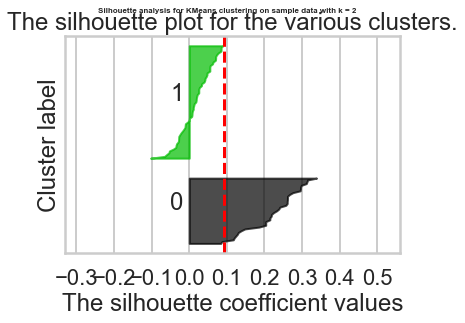

For k = 3 The average silhouette_score is : 0.11889942863638556


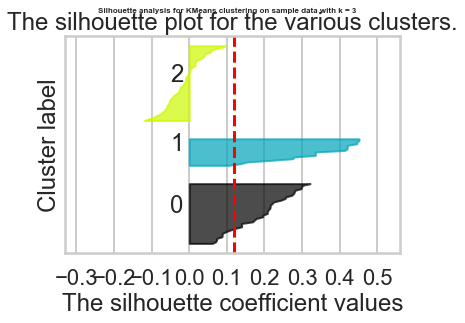

For k = 4 The average silhouette_score is : 0.12167039851355937


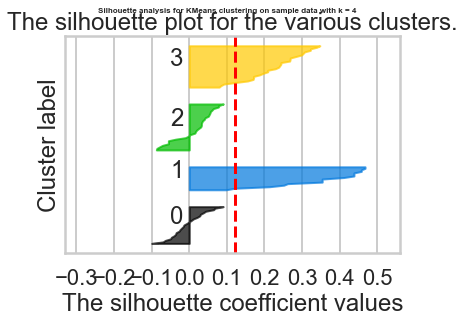

For k = 7 The average silhouette_score is : 0.13365227784322317


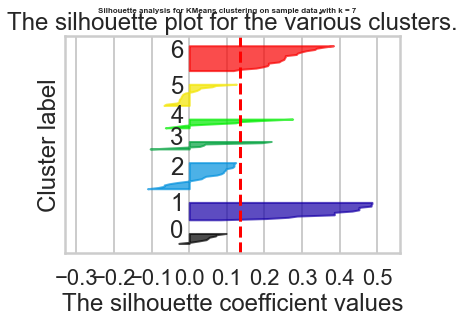

For k = 11 The average silhouette_score is : 0.1286779208894978


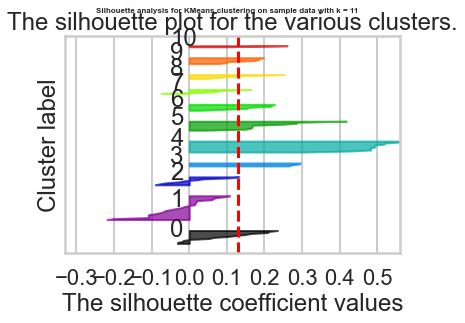

For k = 12 The average silhouette_score is : 0.13343099846782644


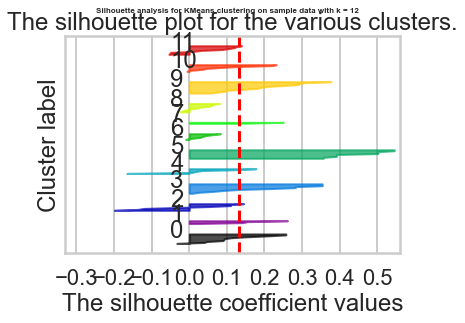

For k = 14 The average silhouette_score is : 0.14891411990661507


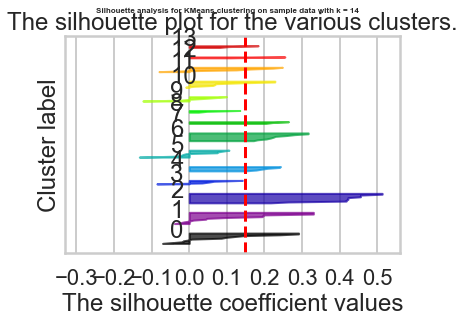

For k = 15 The average silhouette_score is : 0.12820342411206484


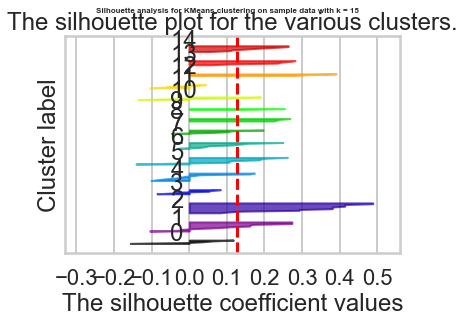

For k = 16 The average silhouette_score is : 0.14228498256022612


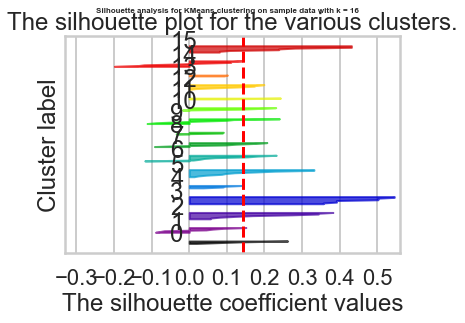

For k = 17 The average silhouette_score is : 0.1311703875908173


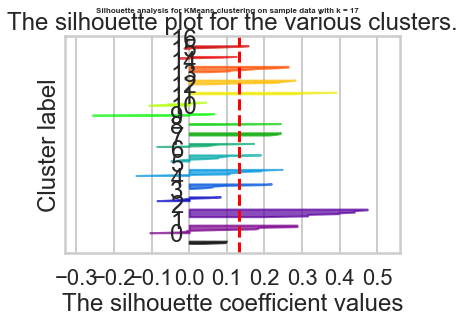

For k = 18 The average silhouette_score is : 0.12814092964696572


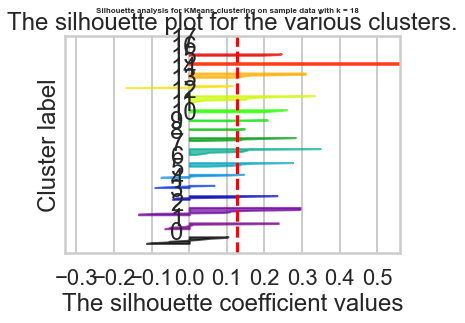

For k = 19 The average silhouette_score is : 0.13726449480720382


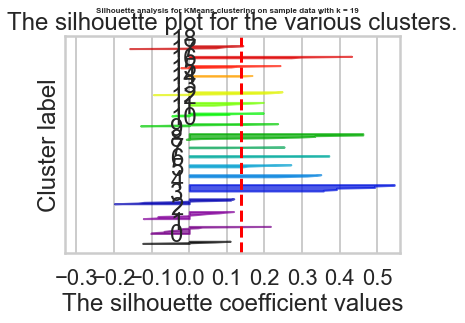

For k = 20 The average silhouette_score is : 0.13019931912638144


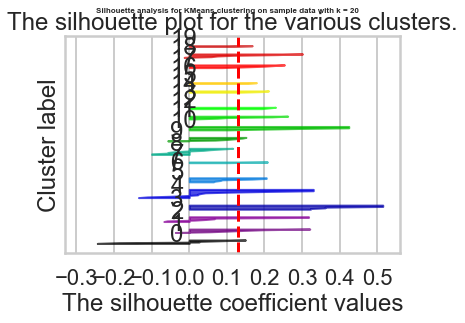

For k = 22 The average silhouette_score is : 0.14522472271471973


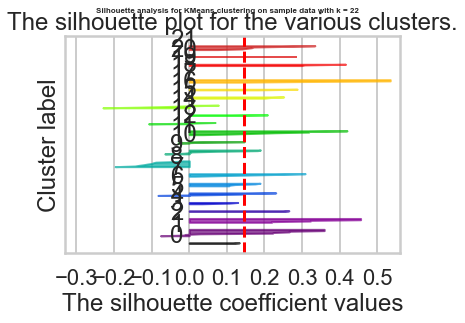

For k = 24 The average silhouette_score is : 0.1310073952675098


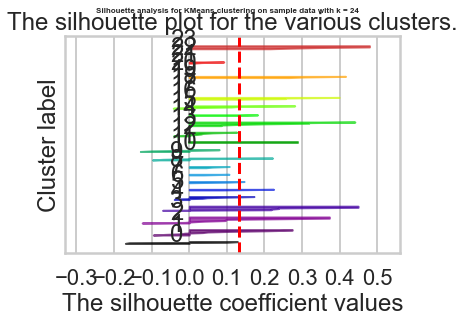

For k = 25 The average silhouette_score is : 0.1379133695147251


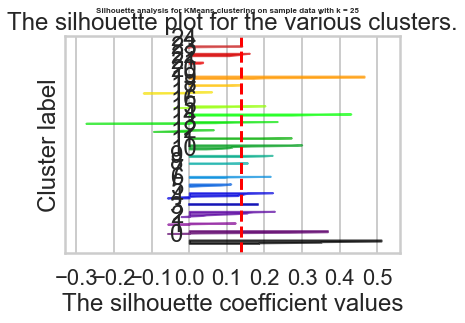

In [311]:
#so, YOU KNOW WHAT?! gonna do a TRIMMED DOWN VERSION!

 
range_n_clusters = [2,3,4,7,11,12,14,15,16,17,18,19,20,22,24,25]

for k in range_n_clusters:
    plt.xlim([-.33,.56])


    clusterer = KMeans(n_clusters=k, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)


    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg)


    sample_silhouette_values = silhouette_samples(dummy_pivot_MASTER_array, cluster_labels)
    
    y_lower = 10

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    # plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xticks([-.3, -.2, -.1, 0, .1, .2, .3, .4, .5])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d"
        % k,
        fontsize=8,
        fontweight="bold")

    plt.show()


For k = 2 The average silhouette_score is : 0.09174871508750351


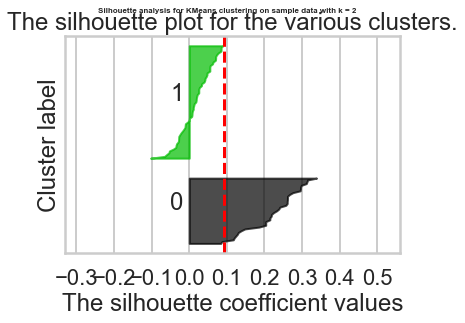

For k = 3 The average silhouette_score is : 0.11889942863638556


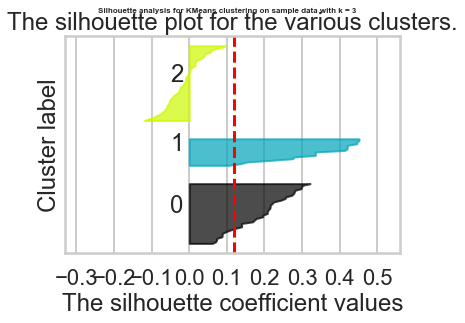

For k = 7 The average silhouette_score is : 0.13365227784322317


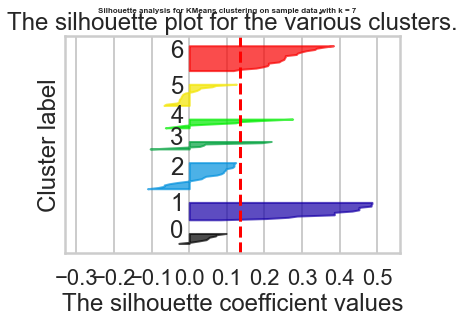

For k = 11 The average silhouette_score is : 0.1286779208894978


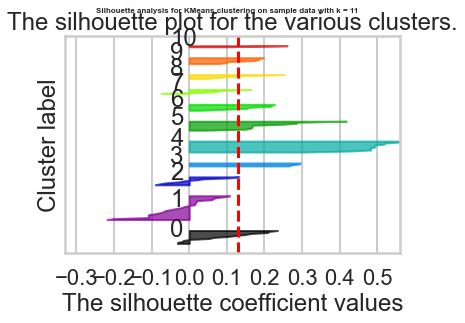

For k = 12 The average silhouette_score is : 0.13343099846782644


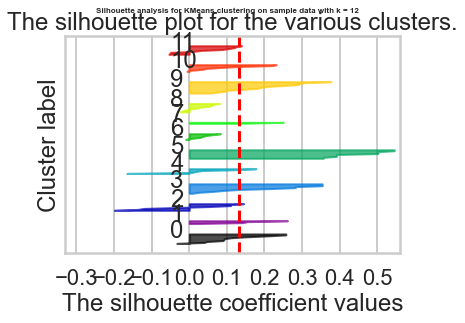

For k = 14 The average silhouette_score is : 0.14891411990661507


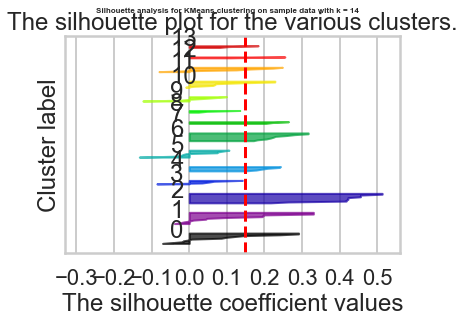

For k = 16 The average silhouette_score is : 0.14228498256022612


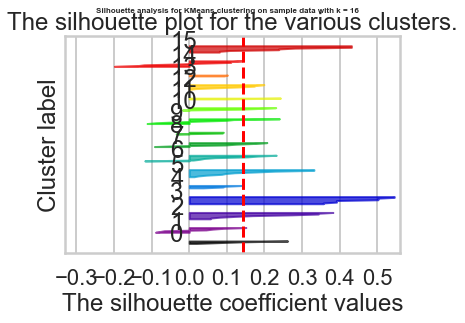

For k = 20 The average silhouette_score is : 0.13019931912638144


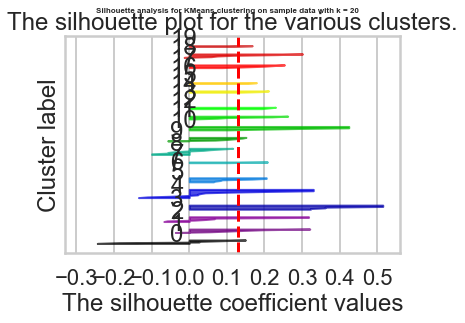

For k = 22 The average silhouette_score is : 0.14522472271471973


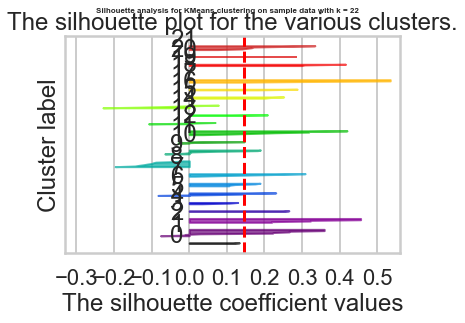

In [312]:
#final round!

#so, YOU KNOW WHAT?! gonna do a TRIMMED DOWN VERSION!

 
range_n_clusters = [2,3,7,11,12,14,16,20,22]

for k in range_n_clusters:
    plt.xlim([-.33,.56])


    clusterer = KMeans(n_clusters=k, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)


    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg)


    sample_silhouette_values = silhouette_samples(dummy_pivot_MASTER_array, cluster_labels)
    
    y_lower = 10

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    # plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xticks([-.3, -.2, -.1, 0, .1, .2, .3, .4, .5])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d"
        % k,
        fontsize=8,
        fontweight="bold")

    plt.show()


For k = 22 The average silhouette_score is : 0.14522472271471973


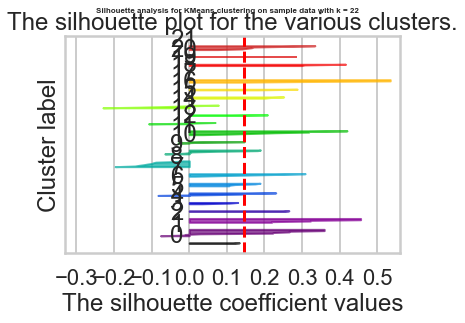

For k = 20 The average silhouette_score is : 0.13019931912638144


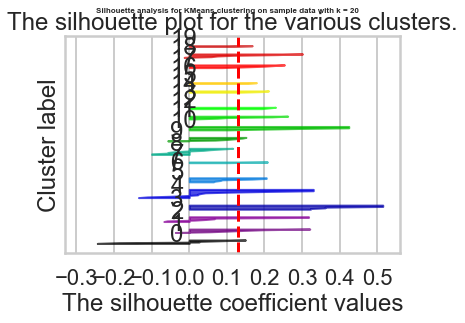

For k = 16 The average silhouette_score is : 0.14228498256022612


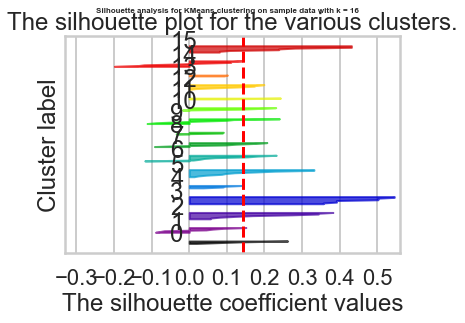

For k = 14 The average silhouette_score is : 0.14891411990661507


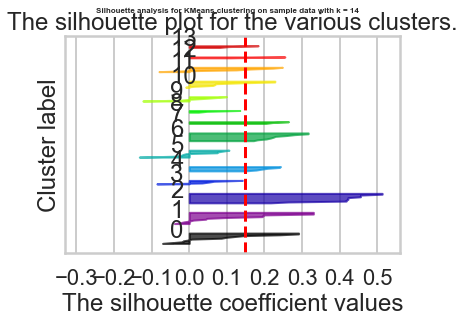

For k = 12 The average silhouette_score is : 0.13343099846782644


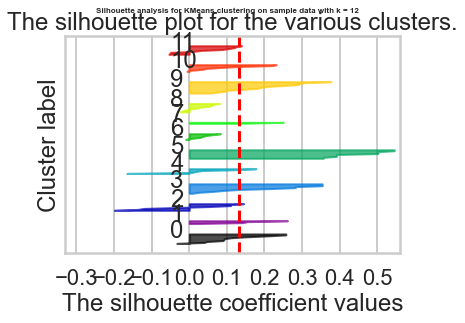

For k = 11 The average silhouette_score is : 0.1286779208894978


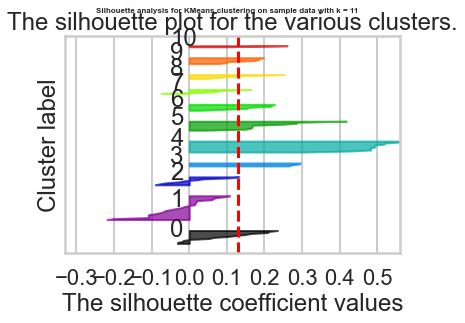

For k = 7 The average silhouette_score is : 0.13365227784322317


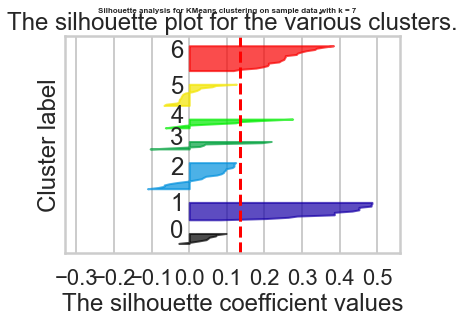

For k = 2 The average silhouette_score is : 0.09174871508750351


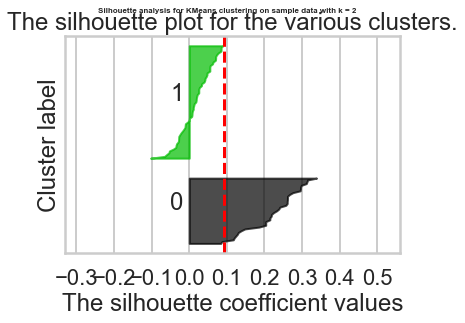

In [313]:
#lol NEXT final round

#actually, now let me also start to order in the order I THINK is best! like as far as
#OVERALL EVENNESS!!!! aka TEAM PERFORMANCE!!!!

 
range_n_clusters = [22,20,16,14,12,11,7,2]

for k in range_n_clusters:
    plt.xlim([-.33,.56])


    clusterer = KMeans(n_clusters=k, random_state=1)

    cluster_labels = clusterer.fit_predict(dummy_pivot_MASTER_array)


    silhouette_avg = silhouette_score(dummy_pivot_MASTER_array, cluster_labels)
    print(
        "For k =",
        k,
        "The average silhouette_score is :",
        silhouette_avg)


    sample_silhouette_values = silhouette_samples(dummy_pivot_MASTER_array, cluster_labels)
    
    y_lower = 10

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper), 0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.yticks([])  # Clear the yaxis labels / ticks
    # plt.xticks([-1, -.8, -.6, -.4, -.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xticks([-.3, -.2, -.1, 0, .1, .2, .3, .4, .5])


    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with k = %d"
        % k,
        fontsize=8,
        fontweight="bold")

    plt.show()


In [ ]:
#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!

#so yeah, those top 3 all look nice!
#but maybe too many k's, cuz they said like keep it small right?

#so if i go w/ one of the lower numbers,
#then, i think 11 def gives you very nice bang for you buck!

#w/ 7 they all basically reach but a bit too uneven

#and w/ 2 they DO both reach but uneven and some negative presence if that
#matters - we can afford to spend a lil more ;P

    #lol in there label1 has got its hands/nose on the wall! lol like
    #kid who has tongue stuck to light pole in winter! ;P

In [ ]:
#OHHH, btw, just rememd we don't necess need a random state (in silhouette)?
#like that was what they did in DOCS just for OUR REPRODUCIBILITY!!!
###########################################################################################

#### 3aiii.  Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

#### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

**Hint:** See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

In [ ]:
#ALHAMDULILLAH!!! lol they don't ask us to do this!!! :P

### 3b. Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

**Hint:** PCA was discussed in the previous subunit. If you need help with it, consult [this useful article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) and [this visual explanation](http://setosa.io/ev/principal-component-analysis/). 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [314]:
# from sklearn.decomposition import PCA

# kmeans=KMeans(n_clusters=7)
# labels=kmeans.fit_predict(dummy_X_array)

# model=PCA(n_components=2)
# transformed=model.fit_transform(dummy_X_array)
# X = transformed[:,0]
# y = transformed[:,1]
# customer_name = dummy_df.customer_name
# df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})

# plt.scatter(X,y,alpha=.5,c=labels,s=10);

# # for x, y, customer in zip(X, y, customer_name):
# #     plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)

# # plt.legend(labels)


In [317]:
dummy_pivot_MASTER.index

Index(['Adams', 'Allen', 'Anderson', 'Bailey', 'Baker', 'Barnes', 'Bell',
       'Bennett', 'Brooks', 'Brown', 'Butler', 'Campbell', 'Carter', 'Clark',
       'Collins', 'Cook', 'Cooper', 'Cox', 'Cruz', 'Davis', 'Diaz', 'Edwards',
       'Evans', 'Fisher', 'Flores', 'Foster', 'Garcia', 'Gomez', 'Gonzalez',
       'Gray', 'Green', 'Gutierrez', 'Hall', 'Harris', 'Hernandez', 'Hill',
       'Howard', 'Hughes', 'Jackson', 'James', 'Jenkins', 'Johnson', 'Jones',
       'Kelly', 'King', 'Lee', 'Lewis', 'Long', 'Lopez', 'Martin', 'Martinez',
       'Miller', 'Mitchell', 'Moore', 'Morales', 'Morgan', 'Morris', 'Murphy',
       'Myers', 'Nelson', 'Nguyen', 'Ortiz', 'Parker', 'Perez', 'Perry',
       'Peterson', 'Phillips', 'Powell', 'Price', 'Ramirez', 'Reed', 'Reyes',
       'Richardson', 'Rivera', 'Roberts', 'Robinson', 'Rodriguez', 'Rogers',
       'Ross', 'Russell', 'Sanchez', 'Sanders', 'Scott', 'Smith', 'Stewart',
       'Sullivan', 'Taylor', 'Thomas', 'Thompson', 'Torres', 'Turner',
    

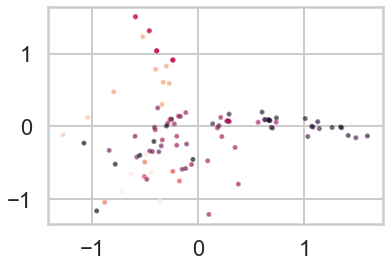

In [327]:
#LET'S REDO THE RIGHT WAY!

from sklearn.decomposition import PCA

kmeans=KMeans(n_clusters=11) #let's go w/ one of the lower numbers to make it easier to follow!
#since gonna be label-color-coordinated! lol
labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

model=PCA(n_components=2)
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index
#REMEM! in dummy_pivot_MASTER, customer_name is the *INDEX*, NOT A COLUMN NAME! that's why had to do like this if using that!
df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})

plt.scatter(X,y,alpha=.5,c=labels,s=10);

#optional reserve lol for the end
# for x, y, customer in zip(X, y, customer_name):
#     plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)

# plt.legend(labels)


In [323]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

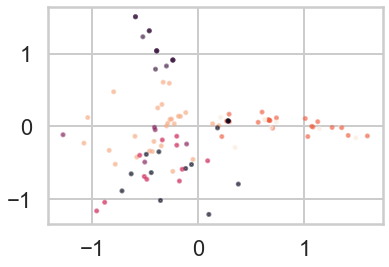

In [328]:
#let's try at even LOWER numbers!!!! to make MORE obvious! lol, didn't consider that
#when looking at Silhouette above/earlier, but at same time, that WASN'T supposed to be
#a reason for consideration!!!! so we good!

kmeans=KMeans(n_clusters=7)
labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

model=PCA(n_components=2) #REMEM! don't confuse PCA's n_clusters aka HOW MANY PRINCIPAL COMPONENTS
#w/ kmeans n_clusters aka #CLUSTERS!!! PCA doesn't have clusters!!!! PCA is for VISUALIZING!
#so that's why we gotta combine them!
#does selection of PCA #PCs affect their PLOT APPEARANCE for the same ones - so like,
#we can do anywhere from 2PCs to ALL 32 PCs - but will the plots look diff??
#LET'S CHECK!!!!

transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index
df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})

plt.scatter(X,y,alpha=.5,c=labels,s=10);

#optional reserve lol for the end
# for x, y, customer in zip(X, y, customer_name):
#     plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)

# plt.legend(labels)


In [ ]:
#okay cool! you do see some clustering based on colors
#interesting that diff colors in the SAME region, like esp the right 'tail' group,
#seem to be diff shades of the SAME color!! wonder if that's on purpose??
####################################################################################

#btw, if you j

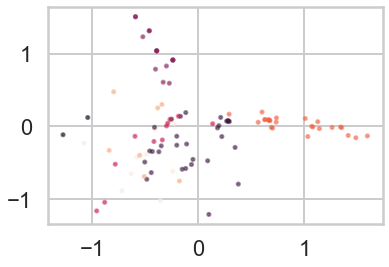

In [329]:
#let's try same except bigger PCA#!!
#let's try at even LOWER numbers!!!! to make MORE obvious! lol, didn't consider that
#when looking at Silhouette above/earlier, but at same time, that WASN'T supposed to be
#a reason for consideration!!!! so we good!

kmeans=KMeans(n_clusters=7)
labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

model=PCA(n_components=32) #REMEM! don't confuse PCA's n_clusters aka HOW MANY PRINCIPAL COMPONENTS
#w/ kmeans n_clusters aka #CLUSTERS!!! PCA doesn't have clusters!!!! PCA is for VISUALIZING!
#so that's why we gotta combine them!


transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index
df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})

plt.scatter(X,y,alpha=.5,c=labels,s=10);

#optional reserve lol for the end
# for x, y, customer in zip(X, y, customer_name):
#     plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)

# plt.legend(labels)


In [ ]:
###########################################################################
#ANSWER TO QUESTION: #does selection of PCA #PCs affect their PLOT APPEARANCE for the same ones - so like,
#we can do anywhere from 2PCs to ALL 32 PCs - but will the plots look diff??
#LET'S CHECK!!!!
#^^^^^^^^^^^^^^^
#OHHHHHHHHH OKAY COOL!!!!! ALHAMDULILLAHI RABBIL 'AALAMEEN!!!
#SO THE CHOICE OF #PCs DOESN'T AFFECT THE PLOT IN ANY WAY IN OUR CASE / FOR OUR PURPOSES
#CUZ WE'RE ONLY CHOOSING THE *FIRST TWO* ANYWAY TO PLOT!!!!!
#SO THAT MEANS WE COULDA JUST LEFT THAT ARG *BLANK*!!!!!!!!!!!! let's do that next!
###########################################################################

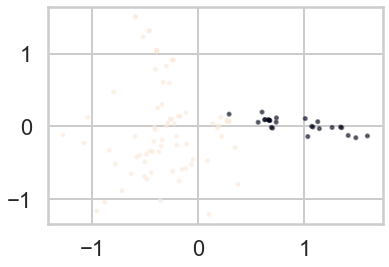

In [330]:
#let's try LOWEST good k of k=2!!!!

kmeans=KMeans(n_clusters=2)
labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

model=PCA()

transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index
df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})

plt.scatter(X,y,alpha=.5,c=labels,s=10);

#optional reserve lol for the end
# for x, y, customer in zip(X, y, customer_name):
#     plt.annotate(customer, (x, y), fontsize=10, alpha=0.75)

# plt.legend(labels)


In [ ]:
#SUBHANALLAHI WA BI HAMDI, SUBHANALLAHIL 'AUDHEEM!!!!!

#AND DIDN'T I SAY GO FOR 2 OR 3 BASED ON THE INITIAL *ELBOW* DIAGRAM?!?

#IN FACT! WE CAN JUST LOOK AT THIS PCA PLOT TO TRY TO GET AN INTUITIVE SENSE OF WHAT
#MAKES SENSE!!!!

#i think homeboy was doing something a little diff in the documentation,
#but if we'd done THIS of comparing these PCA scatts along WITH the Silhouettes,
#WOULDA REALLY HELPED US DECIDE!!!!

#SO IN FACT - LET'S AT LEAST LOOK AT THE SET OF PCA PLOTS @ DIFF kmeans k's!!!!!

#like just looking at the plot, you can see at least probably a fair 3 regions!
#so yeah! let's see what things look like!!!!! will just keep the first few low numbers!!!!



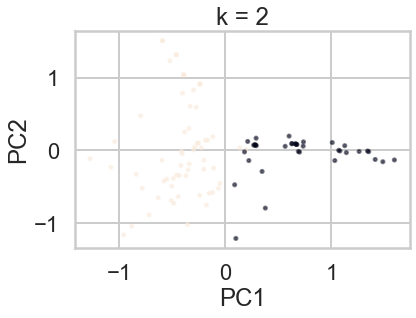

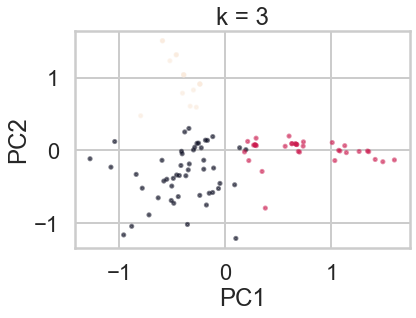

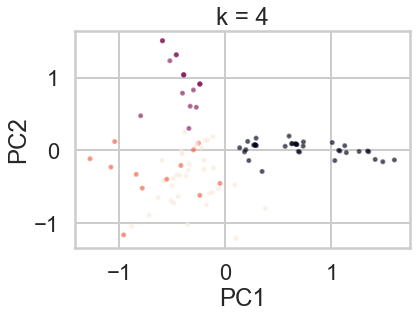

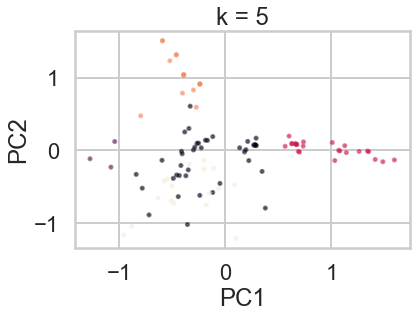

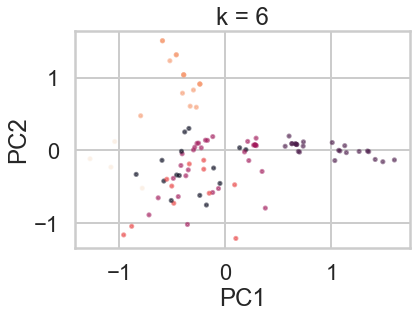

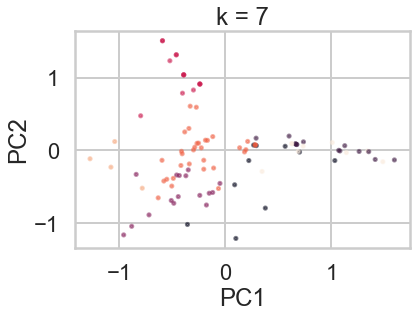

In [511]:
ks = range(2,8)
 
for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    model=PCA()
    transformed=model.fit_transform(dummy_pivot_MASTER_array)
    X = transformed[:,0]
    y = transformed[:,1]
    customer_name = dummy_pivot_MASTER.index
    df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})

    plt.scatter(X,y,alpha=.5,c=labels,s=10)

    plt.title('k = %d' %k)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show();

In [ ]:
#SUBHANALLAH SO W/ THIS HONESTLY *3* LOOKS THE BEST/REALLY GOOD!!!!!!

#AND IF YOU REMEMBER - *THAT WAS MY CHOICE EXACTLY BASED ON THE ELBOW PLOT!!!!!

#SO YEAH!!!!! WHY DIDN'T WE JUST USE THIS IN THE BEGINNING IF WE COULDN'T TELL!!!!

#silhouette is much harder to judge than elbow!!!! alot more criteria/subjective perception
#seems to me!!! unless just going off of HIGHEST VALUE!!!!

#BUT I LOVE THIS VISUALIZATION CUZ IT'S JUST *SOOOOOOOO INTUITIVE*!!!!!

#CAN TELL / MAKE DETERMINATION LITERALLY WITHIN SECONDS!!!!!

#so yeah i love this combo / dynamic duo of kmeans + PCA!

#i think t-SNE would also be/do similarly right??

####################################################################################

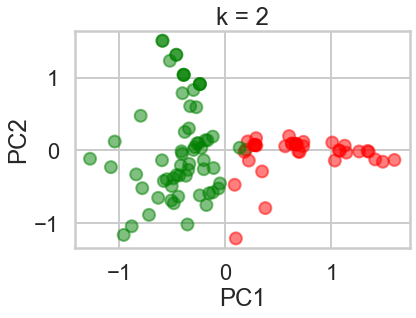

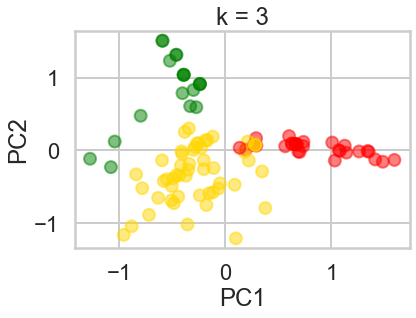

In [417]:
#THE TOPPERS!

#REALIZED I CAN KEEP THIS OUTSIDE OF LOOP!

ks = [2,3]

model=PCA()
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index

 
for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})
    
    colors =  df_pca.cluster_ID.map({0:'g',1:'r',2:'gold'})
    # markers = df_pca.cluster_ID.map({0:'o',1:'x',2:'^'})
    
    # plt.scatter(X,y,alpha=.5,c=colors,s=10)#,marker=markers)

    plt.scatter(X,y,alpha=.5,c=colors)

    plt.title('k = %d' %k)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    # plt.legend()
    plt.show();

/Users/deens/miniforge3/envs/tf_m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


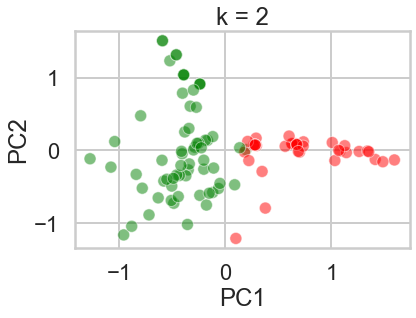

/Users/deens/miniforge3/envs/tf_m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


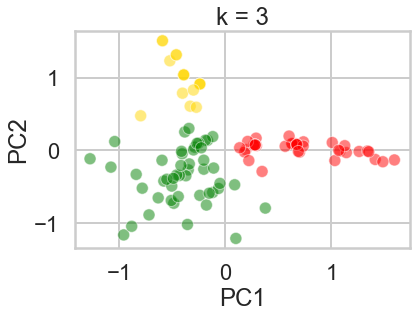

In [402]:
#mannn! could NOT figure out how to get a simple legend up in here to show CLASS!?!?!?!?!?!?!?
####################################################################

#let's try seaborn instead!

import seaborn as sns

ks = [2,3]

model=PCA()
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index

 
for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})
    
    colors =  df_pca.cluster_ID.map({0:'g',1:'r',2:'gold'})
    # markers = df_pca.cluster_ID.map({0:'o',1:'x',2:'^'})
    
    # plt.scatter(X,y,alpha=.5,c=colors,s=10)#,marker=markers)

    sns.scatterplot(X,y,alpha=.5,c=colors')

    plt.title('k = %d' %k)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    # plt.legend()
    plt.show();

In [ ]:
#ARE RED,GREEN,YELLOW THE MOST SPREAD OUT 3 COLORS YOU CAN HAVE!? LIKE EQUALLY SPACED? like tri-pie?!? lol

In [439]:
# scatt=plt.scatter(df_pca.PC1,df_pca.PC2,alpha=.5,c=colors)
# legend=scatt.legend_elements()
# plt.legend(handles=legend[0],labels=['0','1','2'], title="cluster")

In [434]:
legend

([], [])

In [403]:
df_pca

customer_name         X         y  cluster_ID
0          Adams  1.007580  0.108215           1
1          Allen -0.287539  0.044715           0
2       Anderson -0.392032  1.038391           2
3         Bailey  0.699477 -0.022542           1
4          Baker  0.088183 -0.471695           0
..           ...       ...       ...         ...
95      Williams -0.151666 -0.587844           0
96        Wilson  0.688224 -0.013688           1
97          Wood -0.551215 -0.395670           0
98        Wright -0.489805 -0.383307           0
99         Young -0.881994 -1.041788           0

[100 rows x 4 columns]

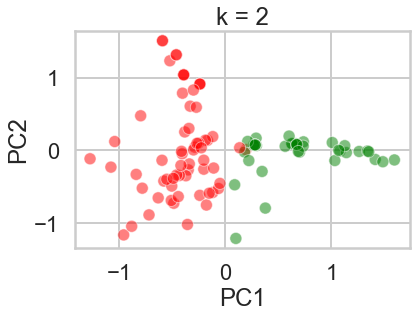

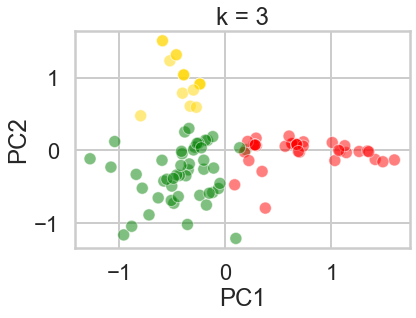

In [421]:
ks = [2,3]

model=PCA()
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index

for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    df_pca = pd.DataFrame({'customer_name':customer_name, 'PC1':X, 'PC2':y, 'cluster_ID':labels})
    
    colors =  df_pca.cluster_ID.map({0:'g',1:'r',2:'gold'})
    # markers = df_pca.cluster_ID.map({0:'o',1:'x',2:'^'})
    
    # plt.scatter(X,y,alpha=.5,c=colors,s=10)#,marker=markers)

    sns.scatterplot(x=X,y=y,data=df_pca,alpha=.5,c=colors)

    plt.title('k = %d' %k)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    # plt.legend()
    plt.show();

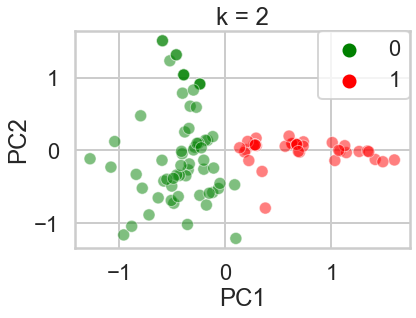

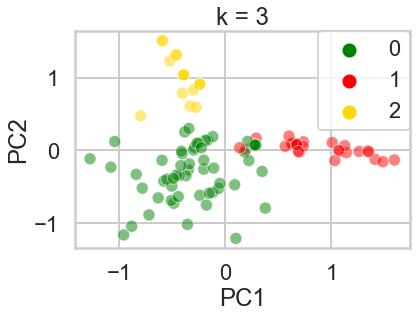

In [452]:
ks = [2,3]

model=PCA()
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index

for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    df_pca = pd.DataFrame({'customer_name':customer_name, 'PC1':X, 'PC2':y, 'cluster_ID':labels})
    
    colors =  {0:'g',1:'r',2:'gold'}

    sns.scatterplot(x=X,y=y,data=df_pca,alpha=.5,hue='cluster_ID',palette=colors)

    plt.title('k = %d' %k)
    # plt.xlabel("PC1")
    # plt.ylabel("PC2") ####DON'T NEED THESE ANYMORE W/ SEABORN!!!!! now that we changed our 'X'/'y' labels!!!!
    plt.legend(loc='upper right',borderaxespad=0)
    plt.show();

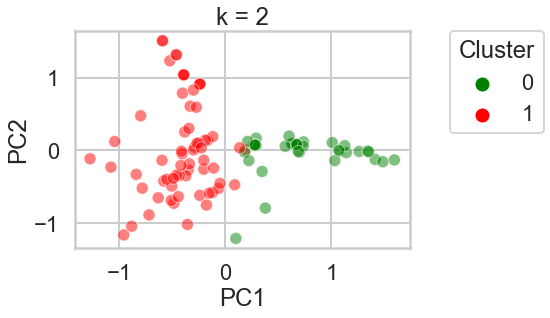

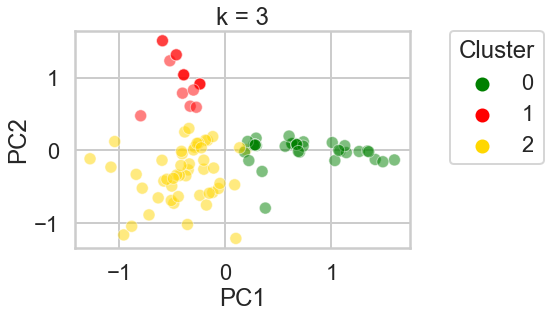

In [530]:
################################################################

#ALHAMDULILLAHI RABBIL 'AALAMEEN!!!!!! HERE IT FINALLY IS!!!!!

ks = [2,3]

model=PCA()
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index

for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    df_pca = pd.DataFrame({'customer_name':customer_name, 'PC1':X, 'PC2':y, 'cluster_ID':labels})
    
    colors =  {0:'g',1:'r',2:'gold'}

    sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,hue='cluster_ID',palette=colors)
    #REALLY DIDN'T WANNA HAVE TO PUT 'x'&'y' BUT IT'S ANNOYING NOW AND WANTS US TO SPECIFY
    #OTHERWISE IT GIVES AN ANNOYING MESSAGE! so, just to shut it up lol

    plt.title('k = %d' %k)
    plt.legend(loc='upper right',borderaxespad=0,bbox_to_anchor=(1.4, 1),title='Cluster') #ALHAMDULILLAH!!!!
    plt.show();

    plt.grid(False)

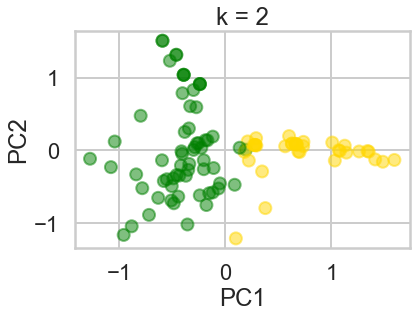

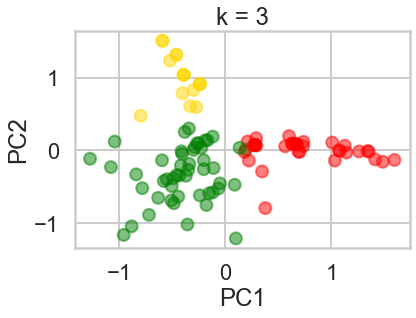

In [470]:
#####################################################################################

#NOTE! you could do plt.scatter() w/ c=labels, then customize colors this way w/ custom color map
#forget about the legend tho lol not even going there!

ks = [2,3]

model=PCA()
transformed=model.fit_transform(dummy_pivot_MASTER_array)
X = transformed[:,0]
y = transformed[:,1]
customer_name = dummy_pivot_MASTER.index

 
for k in ks:
    kmeans=KMeans(n_clusters=k)
    labels=kmeans.fit_predict(dummy_pivot_MASTER_array)

    df_pca = pd.DataFrame({'customer_name':customer_name, 'X':X, 'y':y, 'cluster_ID':labels})
    
    # colors = ['g','r','gold']
    # colors =  df_pca.cluster_ID.map({0:'g',1:'r',2:'gold'})
    # colors = {0:'g',1:'r',2:'gold'}
    from matplotlib import colors
    colors = colors.ListedColormap(['g','r','gold'])
    # markers = df_pca.cluster_ID.map({0:'o',1:'x',2:'^'})
    
    # plt.scatter(X,y,alpha=.5,c=colors,s=10)#,marker=markers)

    plt.scatter(X,y,alpha=.5,c=labels,cmap=colors)

    plt.title('k = %d' %k)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    # plt.legend(labels)
    plt.show();

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

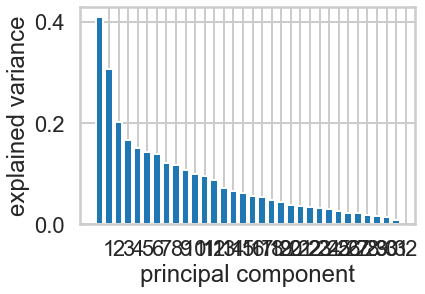

In [488]:
#so remem - what we were doing for our visualization had nothing to do w/ the optimal
#number of Principal Components to choose cuz again we were only using 2 to view anyway
#But now it's getting into that - the optimal - by looking at explained variance!


###############################################################################################
#but now i'm forgetting - once we pick the ideal amount.... like what do we do with that?
#cuz can only visualize up to 3 anyway...
#like we're doing dimension reduction / getting intrinsic dimension
###############################################################################################

# Initialize a new PCA model with a default number of components
pca = PCA()
pca.fit(dummy_pivot_MASTER_array)
features = range(pca.n_components_)
# sns.barplot(x=features,y=pca.explained_variance_)
# sns.catplot(x=features,y=pca.explained_variance_,kind='bar')
plt.bar(features,pca.explained_variance_)
plt.xticks(range(1,33))
plt.ylabel('explained variance')
plt.xlabel('principal component');


#so it seems like problem w/ seaborn options is they're only for when you have a *DF*
#you're taking x/y from as columns?
#plt.bar is shorter for that part itself tho lol but then gotta spend more time/room
#annotating etc


In [ ]:
#sorry again! about squishiness!
#but - looks like here too the SWEETSPOT WOULD BE 3!!
#CUZ AFTER THAT THE DECREASE LEVELS OFF!
#diminishing returns

In [474]:
range(pca.n_components_)

range(0, 32)

In [475]:
pca.explained_variance_

array([0.4096489 , 0.30753551, 0.2022926 , 0.16703717, 0.15015248,
       0.1434373 , 0.13818887, 0.12192294, 0.11636172, 0.10804271,
       0.09937813, 0.09495961, 0.08690352, 0.07256738, 0.0660996 ,
       0.06245473, 0.05634388, 0.05327395, 0.04728801, 0.04393911,
       0.03900424, 0.03625783, 0.03455714, 0.03235091, 0.02940632,
       0.02618221, 0.02308167, 0.02142632, 0.018814  , 0.0165252 ,
       0.01426187, 0.0077789 ])

In [480]:
len(pca.explained_variance_)

32

In [483]:
features

range(0, 32)

In [ ]:
#wait can you have ONE PRINCIPAL COMPONENT??
#############################################

## 4. Conclusions and next steps
### 4a. Conclusions
What can you conclude from your investigations? Make a note, formulate it as clearly as possible, and be prepared to discuss it with your mentor in your next call. 

In [ ]:
#3 clusters and 3 principal components....
#wait, is that the thing we discovered?
#or maybe NOW we just discovered it??
#############################################

### 4b. Other clustering algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [ ]:
#how do we decide which performs best?

#i guess just look at their CLUSTERING using PCA for visualizing! just like we did w/ kmeans

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

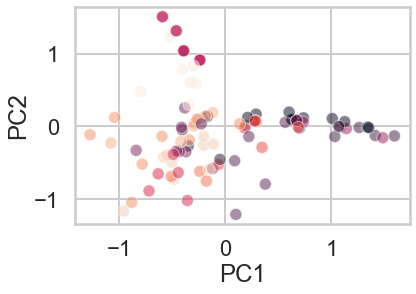

In [507]:
#THIS IS NICE CUZ YOU DON'T NEED TO SPECIFY THE NUMBER OF CLUSTERS!

from sklearn.cluster import AffinityPropagation

model = AffinityPropagation()
model.fit(dummy_pivot_MASTER_array)
labels=model.predict(dummy_pivot_MASTER_array)

sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,c=labels)
np.unique(labels)




In [ ]:
#hmmm - doesn't look too good
#how to measure?
#any hypers to tweak/cross-validate?

[0 1 2]


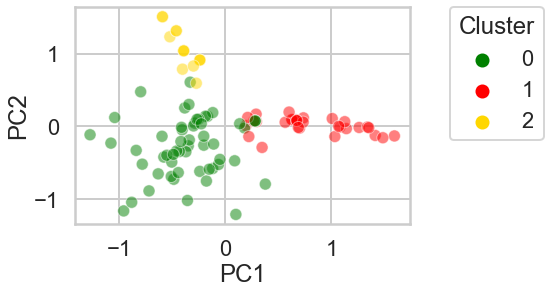

In [534]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3)
labels=model.fit_predict(dummy_pivot_MASTER_array)

colors =  {0:'g',1:'r',2:'gold'}

sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,hue=labels,palette=colors)
print(np.unique(labels))
plt.legend(loc='upper right',borderaxespad=0,bbox_to_anchor=(1.4, 1),title='Cluster');

In [ ]:
#okaiy okaiy! i see you! def better!!!
#OHHHHH! JUST REALIZED! FOR THE ONES THAT *DO* TAKE CLUSTER SPECIFICATION LIKE
#THIS - WE SHOULD JUST DO

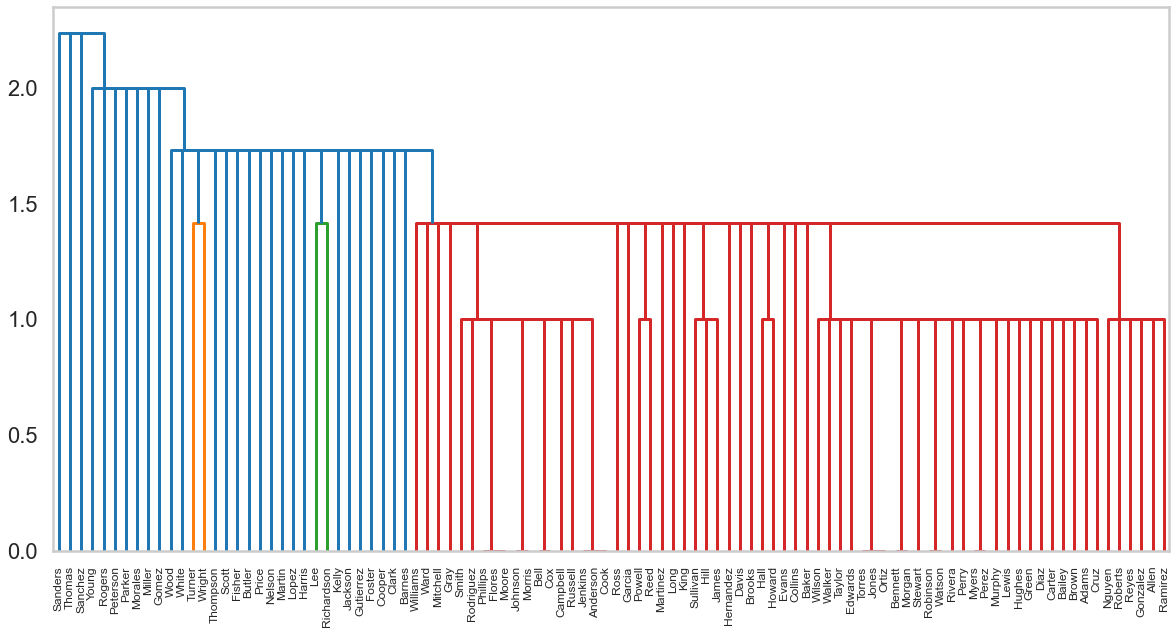

In [548]:
#this one we gotta break up into a couple steps cuz FIRST gotta see
#what the overall hierarchy looks like AND see the HEIGHTS/LEVELS & then
#based on that, we gotta pick the level that'll give us the clusters we want?

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.figure(figsize=(20,10))
#OHHHHHHHHHHHHHHHHHHHHHH!
#THE REASON THE WHOLE RESIZE THING WASN'T WORKING THIS WHOLE TIME WAS
#CUZ YOU HAVE TO PUT IT *BEFORE* NOT ONLY PLT.SHOW() BUT *BEFORE* EVEN THE PLOT CODE!!!!
####################################################################################

mergings = linkage(dummy_pivot_MASTER_array)

dendrogram(mergings,labels=customer_name,leaf_rotation=90,leaf_font_size=12)

plt.grid(False)
#FINALLY GOT RID OF THOSE UGLY GRIDLINES!!!
#HOW TO MAKE IT PERMANENT?!?
##########################################################################################
plt.show()



In [ ]:
#hmmm, interesting... okay so this must be SINGLE, that it defaulted to, cuz of the
#'staircasing' pattern, and so here it seems really hard to get *3* clusters!!!
#WELL LIKE BASICALLY IT'LL INCLUDE *EVERYTHING* IN ONE CLUSTER EXCEPT *2* - AND THEN
#LITERALLY EACH OF THOSE 2 WILL BE EACH THEIR OWN OTHER CLUSTERS!!!!!!
#so let's go to COMPLETE!!!!

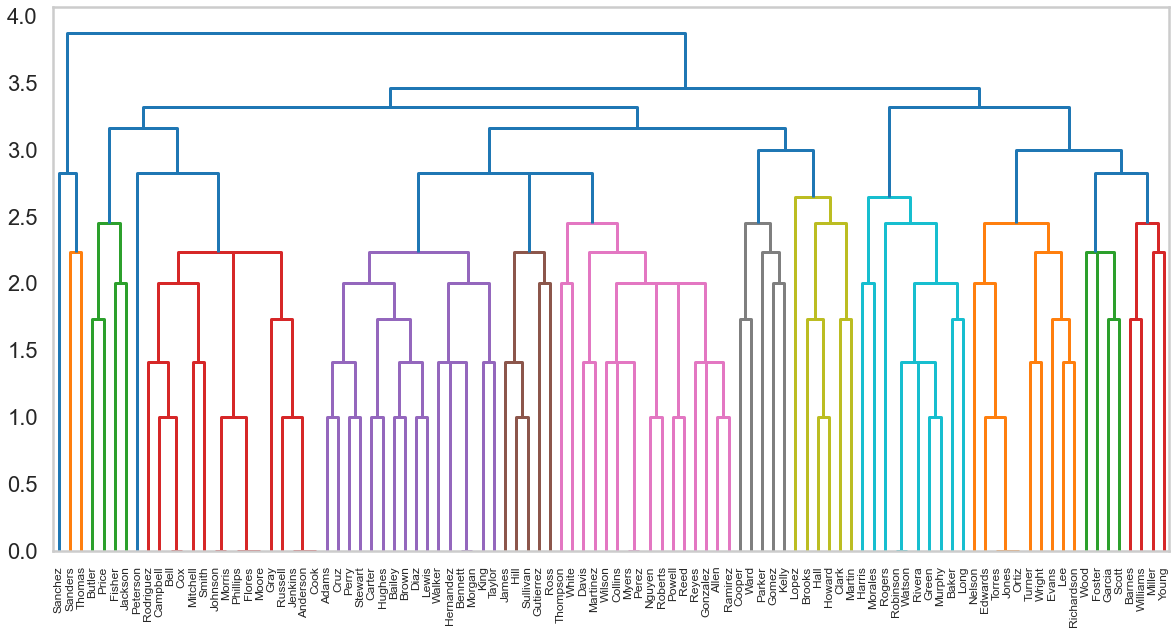

In [554]:
#ok let's try COMPLETE
#this one we gotta break up into a couple steps cuz FIRST gotta see
#what the overall hierarchy looks like AND see the HEIGHTS/LEVELS & then
#based on that, we gotta pick the level that'll give us the clusters we want?

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

plt.figure(figsize=(20,10))

mergings = linkage(dummy_pivot_MASTER_array,method='complete')

dendrogram(mergings,labels=customer_name,leaf_rotation=90,leaf_font_size=12)

plt.grid(False)

plt.show()


In [ ]:
#okay! so this def makes it much more balanced out - here we'd take it down to
#height/level like 3.5/3.6, and then we get those two BIG hanger/balances, but then one
#inny liddoo one all the way on left...
# 
# hmm, so i think we might need to go for more clusters here
# it looks like *5* will be a good bet - hard to say - WISH WE HAD A ####SLIDER#### LOL!
#NOW I SEE THE WISDOM!!!!! HOW DO WE DO THAT?!?!
#but looks like about 3.25?? will have to experiment!
########################################################################

[1 2 3 4 5]


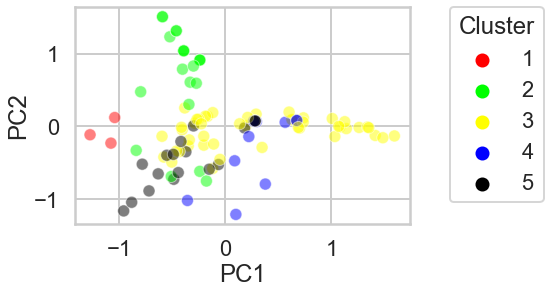

In [579]:
labels = fcluster(mergings,3.25,criterion='distance')

colors =  {1:'r',2:'lime',3:'yellow',4:'b',5:'black'}
#LOL - really hadda try to EXAGGERATE the colors more - even w//@ just 5! wanna
#see how to do it EXACTLY lol like MAXIMAL even spacing on color wheel!!!
#####################################################################################

sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,hue=labels,palette=colors)
print(np.unique(labels))
plt.legend(loc='upper right',borderaxespad=0,bbox_to_anchor=(1.4, 1),title='Cluster');


In [ ]:
#LOL switched the coloring order to make the small LEFT group OUTLIERS >> *RED*
#lol instead of green to show that they're the problem outliers!

[1 2 3]


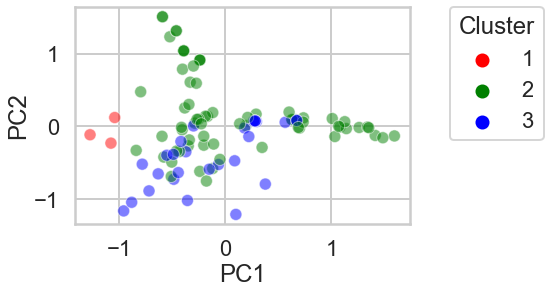

In [585]:
#NICE WELL ALHAMDULILLAH THAT DID MAKE FOR 5 GROUPS!!!!
#but yeah def not as good as others!

#can try for less groups

labels = fcluster(mergings,3.35,criterion='distance')

colors =  {1:'r',2:'g',3:'blue',4:'b',5:'black'}

sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,hue=labels,palette=colors)
print(np.unique(labels))
plt.legend(loc='upper right',borderaxespad=0,bbox_to_anchor=(1.4, 1),title='Cluster');


In [ ]:
##########################################
#SUBHANALLAH!!!! CHANGES SO QUICK!!! SO SENSITIVE!!! CUZ WE ARE NEAR THE VERY TOP!!!
#SO THIS IS WHERE THE *FINAL* *BIG* MERGINGS HAPPPEN!
#so yeah things change very quickly!
#and you see those lone 3 off to the side, that i guess in both single AND complete,
#basically got saved for very last lol

##########################################
#LLOL: CHICAGO: ****
##########################################

[1 2]


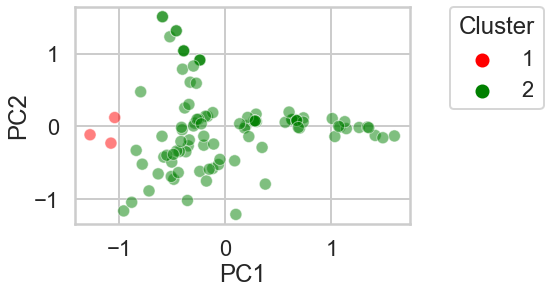

In [584]:
#2 groups

labels = fcluster(mergings,3.5,criterion='distance')

colors =  {1:'r',2:'g',3:'yellow',4:'b',5:'black'}

sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,hue=labels,palette=colors)
print(np.unique(labels))
plt.legend(loc='upper right',borderaxespad=0,bbox_to_anchor=(1.4, 1),title='Cluster');


In [ ]:
#lol so yeah, we don't really like this cuz just doesn't divide nicely
#based on the PCA plot...

In [ ]:
#btw, remem, the way hue is working to color these guys is,
#pc1 & pc2 come from pca transform; then labels are numbers 1 thru 5
#and the list of them is the same length as pc1 & pc2
#so it's like we're telling it just go down the line - the set of labels is
#tacked onto the pc1/pc2 / attached!
#so each of them is given a CLUSTER LABEL and then that corresponds to a COLOR!!!
#so like it's coloring each pc1,pc2 pair of points IN ORDER based on the set of LABELS
#we got, 1->5, that's of the SAME LENGTH, so it's like their lined up,
#and then the COLORS of those labels are customized according to our color map/dict!!!!!!
####################################################################################

In [ ]:
#and last but not least

[-1  0  1  2]


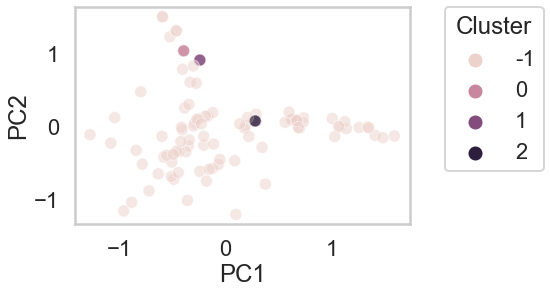

In [607]:
from sklearn.cluster import DBSCAN

#so w/ this one we DO needa specify something - the neighborhood size - like kNN?
#min_samplesint, default=5
# The number of samples (or total weight) in a neighborhood for a point to be considered
#as a core point. This includes the point itself

model = DBSCAN(min_samples=3)
labels=model.fit_predict(dummy_pivot_MASTER_array)

sns.scatterplot(x='PC1',y='PC2',data=df_pca,alpha=.5,hue=labels)
print(np.unique(labels))
plt.legend(loc='upper right',borderaxespad=0,bbox_to_anchor=(1.4, 1),title='Cluster')

plt.grid(False);

In [608]:
#This prob doesn't work well cuz this says it's more for data with HIGH DENSITY CLUSTERS!

#but we might needa do more research into how to find optimal 'eps' param and also
#min points / min samples etc

In [ ]:
#So best are def kmeans & Spectral, and they're very similar @ 3 clusters!